<a href="https://colab.research.google.com/github/Gise46/ChallengeAluraONEORACLE/blob/main/CHALLENGE_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Exploración inicial
print("=== COLUMNAS DISPONIBLES ===")
print(tienda.columns.tolist())
print("\n=== PRIMERAS FILAS ===")
print(tienda.head())

=== COLUMNAS DISPONIBLES ===
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

=== PRIMERAS FILAS ===
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cal

In [4]:
print("\n=== ANÁLISIS DE FACTURACIÓN ===\n")

resultados_facturacion = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    # Buscar columna de precio
    columnas_precio = [col for col in df.columns if any(palabra in col.lower()
                      for palabra in ['precio', 'price', 'valor', 'monto'])]

    if columnas_precio:
        col_precio = columnas_precio[0]

        facturacion_total = df[col_precio].sum()
        facturacion_promedio = df[col_precio].mean()
        num_ventas = len(df)

        resultados_facturacion.append({
            'Tienda': f'Tienda {i}',
            'Facturación Total': facturacion_total,
            'Facturación Promedio': facturacion_promedio,
            'Número de Ventas': num_ventas,
            'Ticket Promedio': facturacion_total / num_ventas
        })

        print(f"Tienda {i}:")
        print(f"  - Facturación Total: ${facturacion_total:,.2f}")
        print(f"  - Número de Ventas: {num_ventas}")
        print(f"  - Ticket Promedio: ${facturacion_total/num_ventas:,.2f}\n")

df_facturacion = pd.DataFrame(resultados_facturacion)
print("\n=== RESUMEN COMPARATIVO ===")
print(df_facturacion)


=== ANÁLISIS DE FACTURACIÓN ===

Tienda 1:
  - Facturación Total: $1,150,880,400.00
  - Número de Ventas: 2359
  - Ticket Promedio: $487,867.91

Tienda 2:
  - Facturación Total: $1,116,343,500.00
  - Número de Ventas: 2359
  - Ticket Promedio: $473,227.43

Tienda 3:
  - Facturación Total: $1,098,019,600.00
  - Número de Ventas: 2359
  - Ticket Promedio: $465,459.77

Tienda 4:
  - Facturación Total: $1,038,375,700.00
  - Número de Ventas: 2358
  - Ticket Promedio: $440,362.89


=== RESUMEN COMPARATIVO ===
     Tienda  Facturación Total  Facturación Promedio  Número de Ventas  \
0  Tienda 1       1.150880e+09         487867.910131              2359   
1  Tienda 2       1.116344e+09         473227.426876              2359   
2  Tienda 3       1.098020e+09         465459.771089              2359   
3  Tienda 4       1.038376e+09         440362.892282              2358   

   Ticket Promedio  
0    487867.910131  
1    473227.426876  
2    465459.771089  
3    440362.892282  


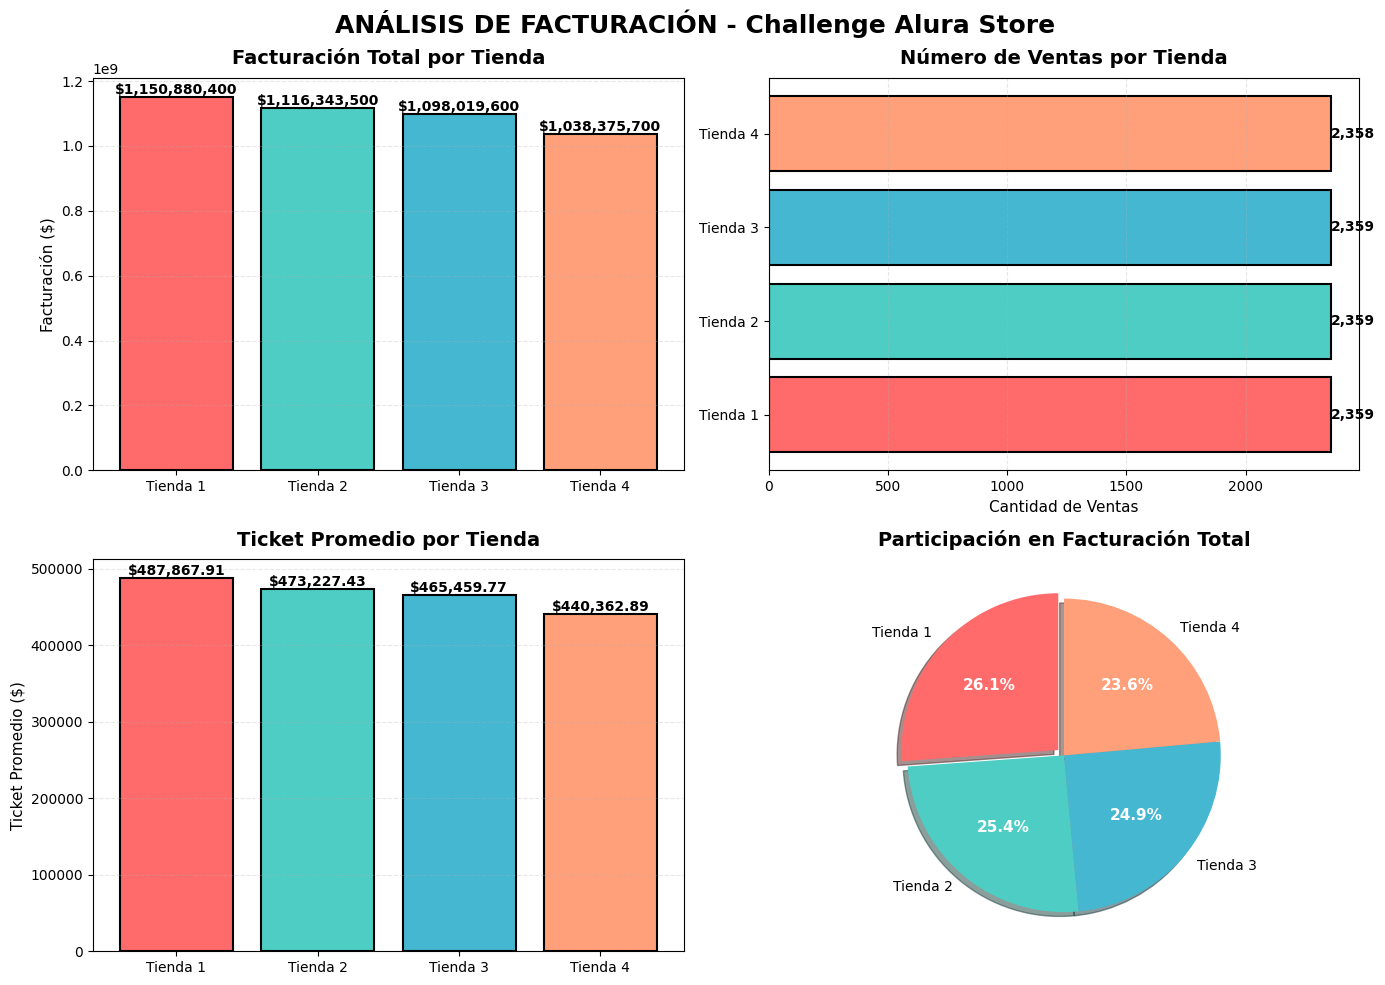

In [5]:
# Visualización de facturación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ANÁLISIS DE FACTURACIÓN - Challenge Alura Store', fontsize=18, fontweight='bold')

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
tiendas = df_facturacion['Tienda']

# Gráfico 1: Facturación Total
ax1 = axes[0, 0]
bars = ax1.bar(tiendas, df_facturacion['Facturación Total'], color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Facturación Total por Tienda', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Facturación ($)', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Número de Ventas
ax2 = axes[0, 1]
bars2 = ax2.barh(tiendas, df_facturacion['Número de Ventas'], color=colores, edgecolor='black', linewidth=1.5)
ax2.set_title('Número de Ventas por Tienda', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Cantidad de Ventas', fontsize=11)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., f'{int(width):,}',
            ha='left', va='center', fontsize=10, fontweight='bold')

# Gráfico 3: Ticket Promedio
ax3 = axes[1, 0]
bars3 = ax3.bar(tiendas, df_facturacion['Ticket Promedio'], color=colores, edgecolor='black', linewidth=1.5)
ax3.set_title('Ticket Promedio por Tienda', fontsize=14, fontweight='bold', pad=10)
ax3.set_ylabel('Ticket Promedio ($)', fontsize=11)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 4: Participación (Pie)
ax4 = axes[1, 1]
explode = [0.05 if i == df_facturacion['Facturación Total'].argmax() else 0
           for i in range(len(df_facturacion))]
wedges, texts, autotexts = ax4.pie(df_facturacion['Facturación Total'],
                                     labels=tiendas, autopct='%1.1f%%',
                                     colors=colores, explode=explode,
                                     shadow=True, startangle=90)
ax4.set_title('Participación en Facturación Total', fontsize=14, fontweight='bold', pad=10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

In [6]:
# Identificar tienda con menor facturación
tienda_min = df_facturacion.loc[df_facturacion['Facturación Total'].idxmin()]
print(f"\n⚠️ TIENDA CON MENOR FACTURACIÓN: {tienda_min['Tienda']}")
print(f"   Facturación: ${tienda_min['Facturación Total']:,.2f}")


⚠️ TIENDA CON MENOR FACTURACIÓN: Tienda 4
   Facturación: $1,038,375,700.00


# 2. Ventas por categoría

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

print("=== ANÁLISIS DE VENTAS POR CATEGORÍA ===\n")

resultados_categorias = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    print(f"\n--- Tienda {i} ---")

    # Buscar la columna específica
    col_cat = None

    # Primero buscar exactamente "categoría del Producto"
    if 'categoría del Producto' in df.columns:
        col_cat = 'categoría del Producto'
    else:
        # Búsqueda flexible por si tiene otro nombre
        for col in df.columns:
            if 'categor' in col.lower() and 'producto' in col.lower():
                col_cat = col
                break

    if col_cat:
        print(f"✓ Columna encontrada: '{col_cat}'")

        # Contar ventas por categoría
        ventas_cat = df[col_cat].value_counts()

        print(f"  Total de categorías únicas: {len(ventas_cat)}")
        print(f"  Total de registros: {len(df)}")
        print(f"\n  Top 5 categorías más vendidas:")

        for idx, (cat, cant) in enumerate(ventas_cat.head().items(), 1):
            porcentaje = (cant / len(df)) * 100
            print(f"    {idx}. {cat}: {cant} ventas ({porcentaje:.1f}%)")

        resultados_categorias.append({
            'tienda': i,
            'df': df,
            'columna': col_cat,
            'ventas': ventas_cat
        })
    else:
        print(f"✗ No se encontró columna de categoría")
        print(f"  Columnas disponibles: {df.columns.tolist()}")

print(f"\n{'='*80}")
print(f"Resumen: Se encontraron datos en {len(resultados_categorias)} tiendas")

=== ANÁLISIS DE VENTAS POR CATEGORÍA ===


--- Tienda 1 ---
✓ Columna encontrada: 'Categoría del Producto'
  Total de categorías únicas: 8
  Total de registros: 2359

  Top 5 categorías más vendidas:
    1. Muebles: 465 ventas (19.7%)
    2. Electrónicos: 448 ventas (19.0%)
    3. Juguetes: 324 ventas (13.7%)
    4. Electrodomésticos: 312 ventas (13.2%)
    5. Deportes y diversión: 284 ventas (12.0%)

--- Tienda 2 ---
✓ Columna encontrada: 'Categoría del Producto'
  Total de categorías únicas: 8
  Total de registros: 2359

  Top 5 categorías más vendidas:
    1. Muebles: 442 ventas (18.7%)
    2. Electrónicos: 422 ventas (17.9%)
    3. Juguetes: 313 ventas (13.3%)
    4. Electrodomésticos: 305 ventas (12.9%)
    5. Deportes y diversión: 275 ventas (11.7%)

--- Tienda 3 ---
✓ Columna encontrada: 'Categoría del Producto'
  Total de categorías únicas: 8
  Total de registros: 2359

  Top 5 categorías más vendidas:
    1. Muebles: 499 ventas (21.2%)
    2. Electrónicos: 451 ventas (19.1%)
 

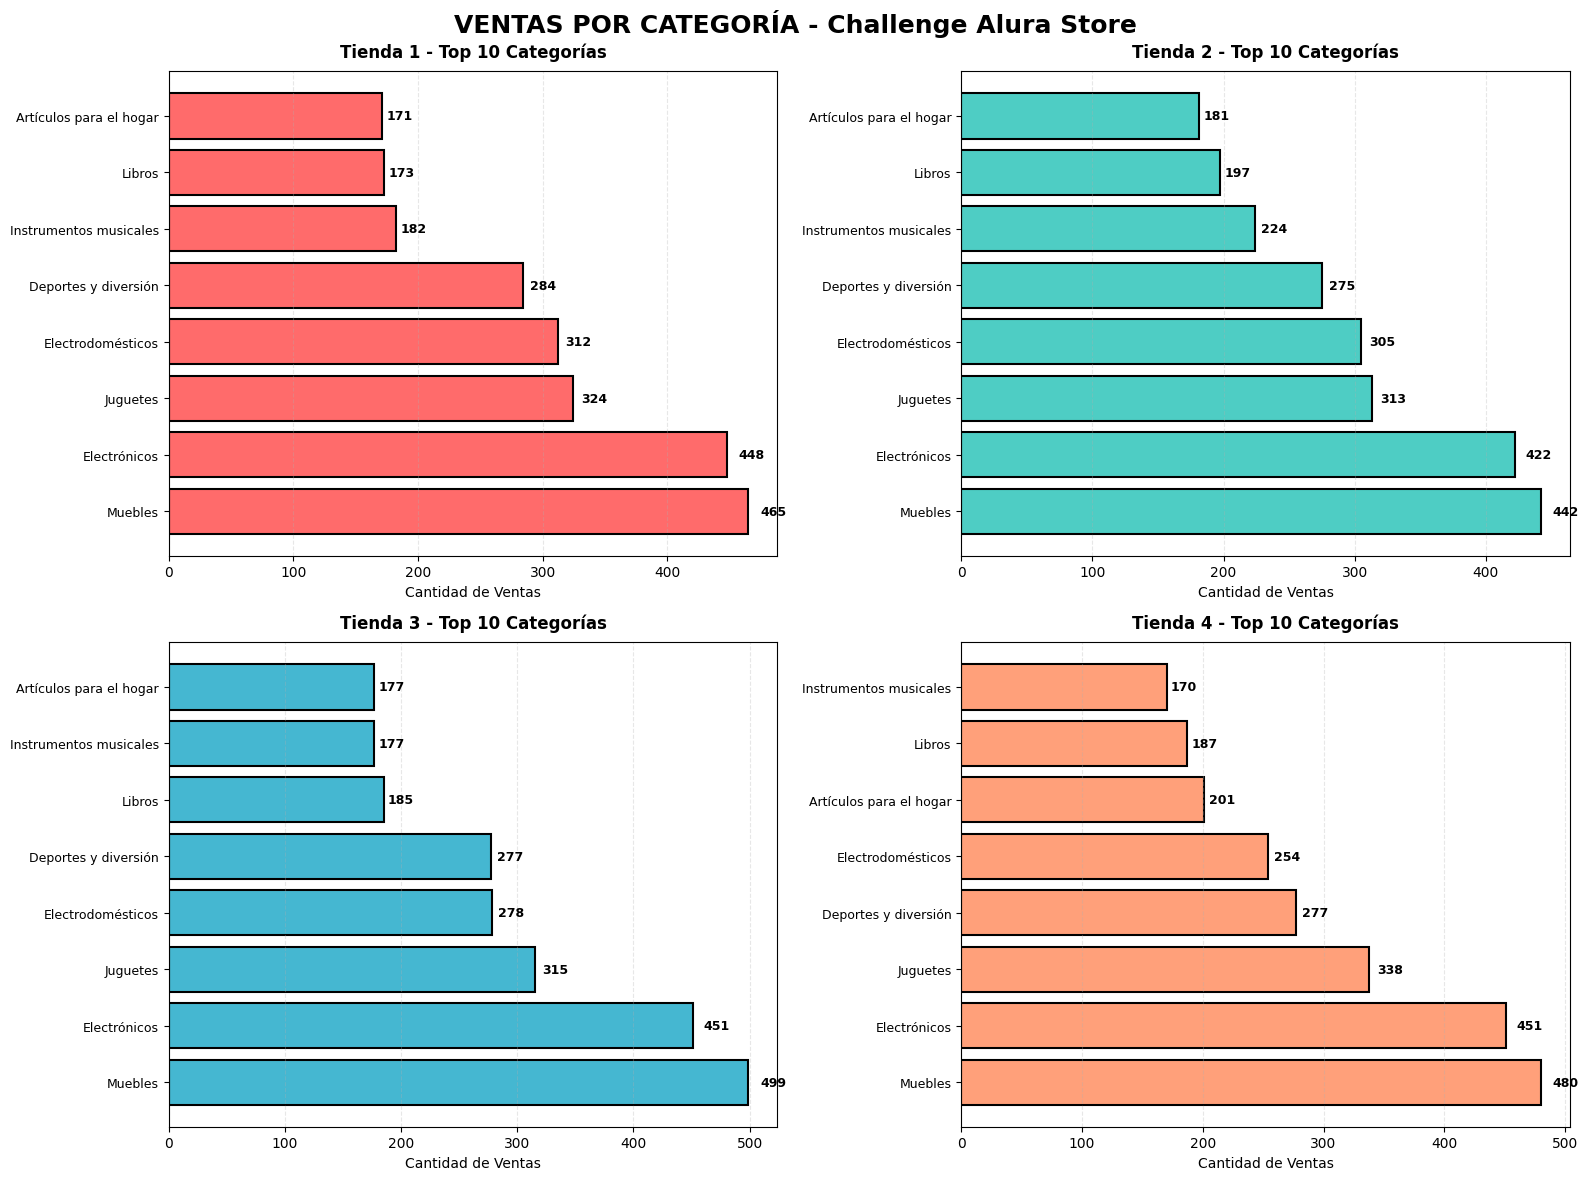


=== CATEGORÍA MÁS VENDIDA POR TIENDA ===

Tienda 1: Muebles
  └─ 465 ventas (19.7% del total de la tienda)

Tienda 2: Muebles
  └─ 442 ventas (18.7% del total de la tienda)

Tienda 3: Muebles
  └─ 499 ventas (21.2% del total de la tienda)

Tienda 4: Muebles
  └─ 480 ventas (20.4% del total de la tienda)



In [8]:
# Visualización de ventas por categoría
if len(resultados_categorias) > 0:
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('VENTAS POR CATEGORÍA - Challenge Alura Store', fontsize=18, fontweight='bold')
    axes = axes.flatten()

    colores_cat = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    for idx, resultado in enumerate(resultados_categorias):
        ax = axes[idx]

        # Tomar top 10 categorías
        ventas_top = resultado['ventas'].head(10)

        # Crear gráfico de barras horizontales
        bars = ax.barh(range(len(ventas_top)), ventas_top.values,
                       color=colores_cat[idx], edgecolor='black', linewidth=1.5)

        ax.set_yticks(range(len(ventas_top)))
        ax.set_yticklabels(ventas_top.index, fontsize=9)
        ax.set_xlabel('Cantidad de Ventas', fontsize=10)
        ax.set_title(f'Tienda {resultado["tienda"]} - Top 10 Categorías',
                     fontsize=12, fontweight='bold', pad=10)
        ax.grid(axis='x', alpha=0.3, linestyle='--')

        # Agregar valores a las barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + width*0.02, bar.get_y() + bar.get_height()/2.,
                    f'{int(width)}',
                    ha='left', va='center', fontsize=9, fontweight='bold')

    # Ocultar ejes no utilizados
    for idx in range(len(resultados_categorias), 4):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n" + "="*80)
    print("=== CATEGORÍA MÁS VENDIDA POR TIENDA ===\n")

    for resultado in resultados_categorias:
        cat_top = resultado['ventas'].index[0]
        ventas_top = resultado['ventas'].values[0]
        total = resultado['ventas'].sum()
        porcentaje = (ventas_top / total) * 100

        print(f"Tienda {resultado['tienda']}: {cat_top}")
        print(f"  └─ {ventas_top} ventas ({porcentaje:.1f}% del total de la tienda)\n")

else:
    print("\n⚠️ No se pudieron generar gráficos porque no se encontraron datos de categoría")

In [9]:
# Análisis comparativo entre tiendas
if len(resultados_categorias) > 0:
    print("\n" + "="*80)
    print("=== ANÁLISIS COMPARATIVO ===\n")

    # Encontrar categorías comunes entre todas las tiendas
    categorias_todas = []
    for resultado in resultados_categorias:
        categorias_todas.extend(resultado['ventas'].index.tolist())

    from collections import Counter
    contador_cat = Counter(categorias_todas)

    print(f"Total de categorías diferentes entre todas las tiendas: {len(contador_cat)}")
    print(f"\nCategorías que aparecen en todas las tiendas:")

    categorias_comunes = [cat for cat, count in contador_cat.items() if count == len(resultados_categorias)]

    if categorias_comunes:
        for cat in categorias_comunes[:10]:  # Mostrar las primeras 10
            print(f"  • {cat}")
    else:
        print("  No hay categorías comunes en todas las tiendas")

    # Resumen por tienda
    print(f"\n{'='*80}")
    print("=== RESUMEN DE DIVERSIDAD DE CATEGORÍAS ===\n")

    for resultado in resultados_categorias:
        num_categorias = len(resultado['ventas'])
        num_ventas = resultado['ventas'].sum()
        promedio_por_cat = num_ventas / num_categorias

        print(f"Tienda {resultado['tienda']}:")
        print(f"  • Categorías diferentes: {num_categorias}")
        print(f"  • Total de ventas: {num_ventas}")
        print(f"  • Promedio por categoría: {promedio_por_cat:.1f} ventas")

        # Concentración (% de las top 3 categorías)
        top3_sum = resultado['ventas'].head(3).sum()
        concentracion = (top3_sum / num_ventas) * 100
        print(f"  • Concentración (Top 3): {concentracion:.1f}%")
        print()


=== ANÁLISIS COMPARATIVO ===

Total de categorías diferentes entre todas las tiendas: 8

Categorías que aparecen en todas las tiendas:
  • Muebles
  • Electrónicos
  • Juguetes
  • Electrodomésticos
  • Deportes y diversión
  • Instrumentos musicales
  • Libros
  • Artículos para el hogar

=== RESUMEN DE DIVERSIDAD DE CATEGORÍAS ===

Tienda 1:
  • Categorías diferentes: 8
  • Total de ventas: 2359
  • Promedio por categoría: 294.9 ventas
  • Concentración (Top 3): 52.4%

Tienda 2:
  • Categorías diferentes: 8
  • Total de ventas: 2359
  • Promedio por categoría: 294.9 ventas
  • Concentración (Top 3): 49.9%

Tienda 3:
  • Categorías diferentes: 8
  • Total de ventas: 2359
  • Promedio por categoría: 294.9 ventas
  • Concentración (Top 3): 53.6%

Tienda 4:
  • Categorías diferentes: 8
  • Total de ventas: 2358
  • Promedio por categoría: 294.8 ventas
  • Concentración (Top 3): 53.8%



# 3. Calificación promedio de la tienda


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=== ANÁLISIS DE CALIFICACIONES ===\n")

resultados_calificaciones = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    # Usar directamente la columna "Calificación"
    if 'Calificación' in df.columns:
        col_calif = 'Calificación'

        print(f"--- Tienda {i} ---")
        print(f"✓ Columna encontrada: '{col_calif}'")

        # Calcular métricas
        calif_promedio = df[col_calif].mean()
        calif_mediana = df[col_calif].median()
        calif_min = df[col_calif].min()
        calif_max = df[col_calif].max()
        calif_std = df[col_calif].std()

        # Distribución de calificaciones
        distribucion = df[col_calif].value_counts().sort_index()

        resultados_calificaciones.append({
            'Tienda': f'Tienda {i}',
            'Calificacion_Promedio': calif_promedio,
            'Calificacion_Mediana': calif_mediana,
            'Calificacion_Minima': calif_min,
            'Calificacion_Maxima': calif_max,
            'Desviacion_Estandar': calif_std,
            'Total_Calificaciones': len(df),
            'distribucion': distribucion
        })

        print(f"  • Calificación Promedio: {calif_promedio:.2f}")
        print(f"  • Calificación Mediana: {calif_mediana:.2f}")
        print(f"  • Desviación Estándar: {calif_std:.2f}")
        print(f"  • Rango: {calif_min:.1f} - {calif_max:.1f}")
        print(f"  • Total de calificaciones: {len(df)}")
        print()
    else:
        print(f"✗ Tienda {i}: No se encontró la columna 'Calificación'")

# Crear DataFrame con resultados
df_calificaciones = pd.DataFrame(resultados_calificaciones)

print("="*80)
print("\n=== RESUMEN COMPARATIVO DE CALIFICACIONES ===\n")
print(df_calificaciones[['Tienda', 'Calificacion_Promedio', 'Calificacion_Mediana',
                         'Desviacion_Estandar', 'Total_Calificaciones']])

=== ANÁLISIS DE CALIFICACIONES ===

--- Tienda 1 ---
✓ Columna encontrada: 'Calificación'
  • Calificación Promedio: 3.98
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.42
  • Rango: 1.0 - 5.0
  • Total de calificaciones: 2359

--- Tienda 2 ---
✓ Columna encontrada: 'Calificación'
  • Calificación Promedio: 4.04
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.36
  • Rango: 1.0 - 5.0
  • Total de calificaciones: 2359

--- Tienda 3 ---
✓ Columna encontrada: 'Calificación'
  • Calificación Promedio: 4.05
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.39
  • Rango: 1.0 - 5.0
  • Total de calificaciones: 2359

--- Tienda 4 ---
✓ Columna encontrada: 'Calificación'
  • Calificación Promedio: 4.00
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.40
  • Rango: 1.0 - 5.0
  • Total de calificaciones: 2358


=== RESUMEN COMPARATIVO DE CALIFICACIONES ===

     Tienda  Calificacion_Promedio  Calificacion_Mediana  Desviacion_Estandar  \
0  Tienda 1            

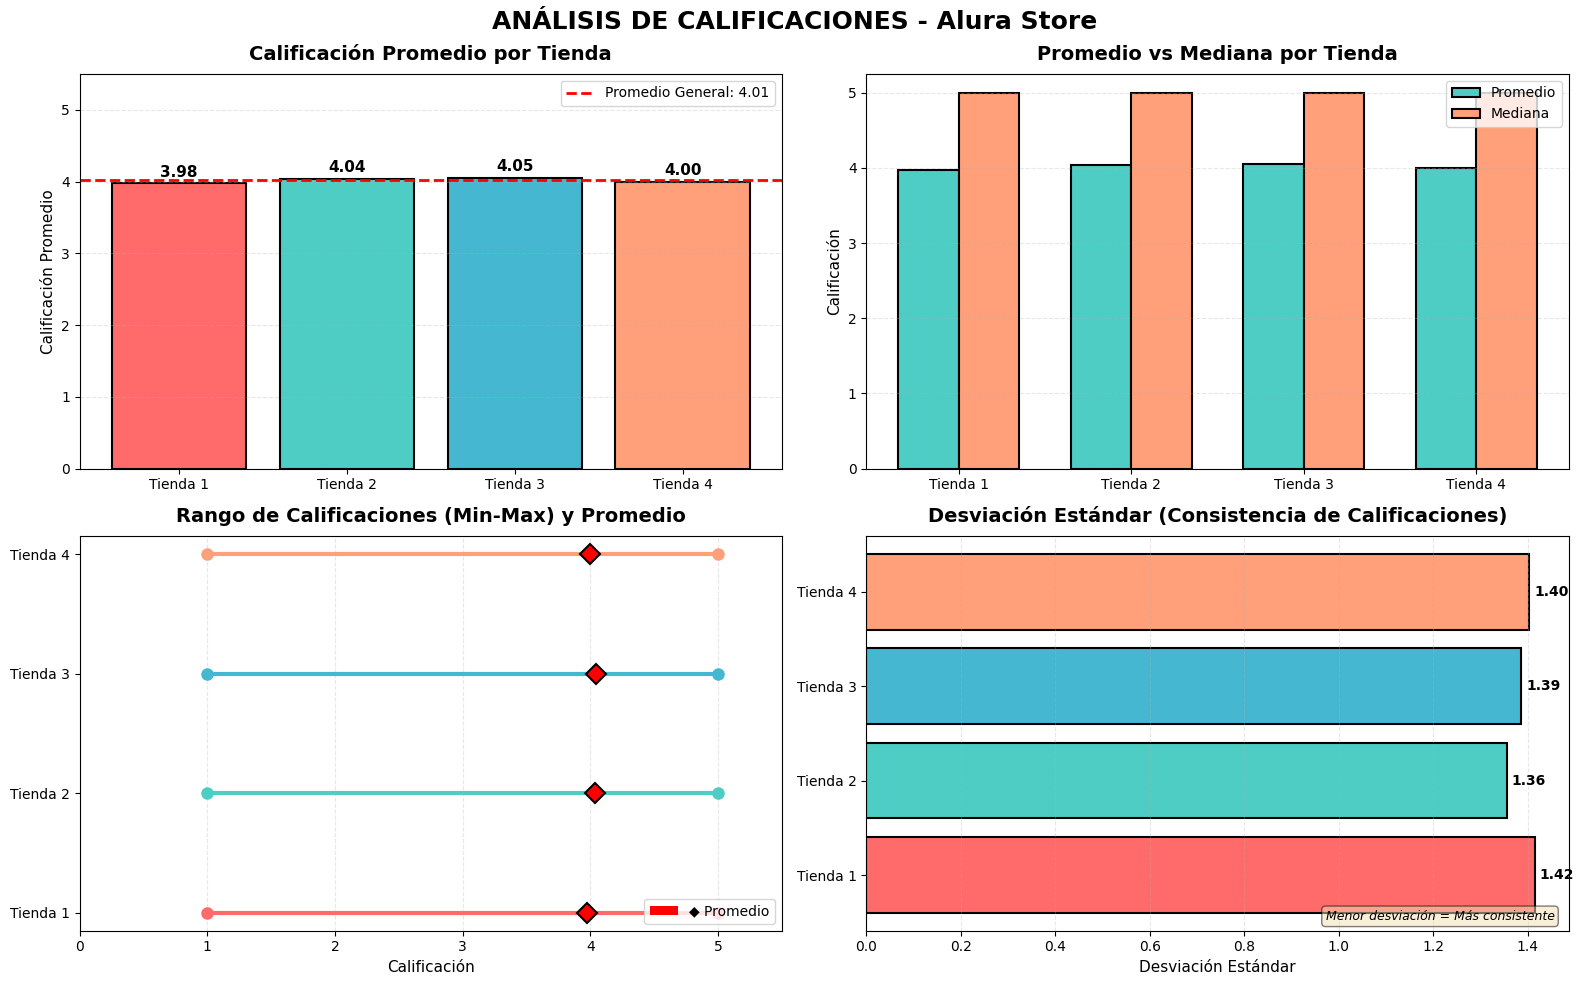

In [11]:
# Visualización 1: Gráficos comparativos principales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ANÁLISIS DE CALIFICACIONES - Alura Store', fontsize=18, fontweight='bold')

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Gráfico 1: Calificación promedio por tienda
ax1 = axes[0, 0]
bars = ax1.bar(df_calificaciones['Tienda'], df_calificaciones['Calificacion_Promedio'],
               color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Calificación Promedio por Tienda', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Calificación Promedio', fontsize=11)
ax1.set_ylim(0, 5.5)

# Línea de promedio general
promedio_general = df_calificaciones['Calificacion_Promedio'].mean()
ax1.axhline(y=promedio_general, color='red', linestyle='--', linewidth=2,
            label=f'Promedio General: {promedio_general:.2f}')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico 2: Comparativa Promedio vs Mediana
ax2 = axes[0, 1]
x = np.arange(len(df_calificaciones))
width = 0.35

bars1 = ax2.bar(x - width/2, df_calificaciones['Calificacion_Promedio'], width,
                label='Promedio', color='#4ECDC4', edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x + width/2, df_calificaciones['Calificacion_Mediana'], width,
                label='Mediana', color='#FFA07A', edgecolor='black', linewidth=1.5)

ax2.set_title('Promedio vs Mediana por Tienda', fontsize=14, fontweight='bold', pad=10)
ax2.set_ylabel('Calificación', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(df_calificaciones['Tienda'])
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 3: Rango de calificaciones (min-max)
ax3 = axes[1, 0]
tiendas_nombres = df_calificaciones['Tienda']
y_pos = np.arange(len(tiendas_nombres))

# Crear barras de error para mostrar el rango
for i, (tienda, row) in enumerate(df_calificaciones.iterrows()):
    ax3.plot([row['Calificacion_Minima'], row['Calificacion_Maxima']], [i, i],
             'o-', linewidth=3, markersize=8, color=colores[i], label=row['Tienda'])
    ax3.plot(row['Calificacion_Promedio'], i, 'D', markersize=10,
             color='red', markeredgecolor='black', markeredgewidth=1.5)

ax3.set_yticks(y_pos)
ax3.set_yticklabels(tiendas_nombres)
ax3.set_xlabel('Calificación', fontsize=11)
ax3.set_title('Rango de Calificaciones (Min-Max) y Promedio', fontsize=14, fontweight='bold', pad=10)
ax3.grid(axis='x', alpha=0.3, linestyle='--')
ax3.set_xlim(0, 5.5)

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='◆ Promedio')]
ax3.legend(handles=legend_elements, fontsize=10, loc='lower right')

# Gráfico 4: Desviación estándar (consistencia)
ax4 = axes[1, 1]
bars = ax4.barh(df_calificaciones['Tienda'], df_calificaciones['Desviacion_Estandar'],
                color=colores, edgecolor='black', linewidth=1.5)
ax4.set_title('Desviación Estándar (Consistencia de Calificaciones)', fontsize=14, fontweight='bold', pad=10)
ax4.set_xlabel('Desviación Estándar', fontsize=11)
ax4.grid(axis='x', alpha=0.3, linestyle='--')

# Agregar valores
for bar in bars:
    width = bar.get_width()
    ax4.text(width + 0.01, bar.get_y() + bar.get_height()/2., f'{width:.2f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

# Nota explicativa
ax4.text(0.98, 0.02, 'Menor desviación = Más consistente',
         transform=ax4.transAxes, fontsize=9, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

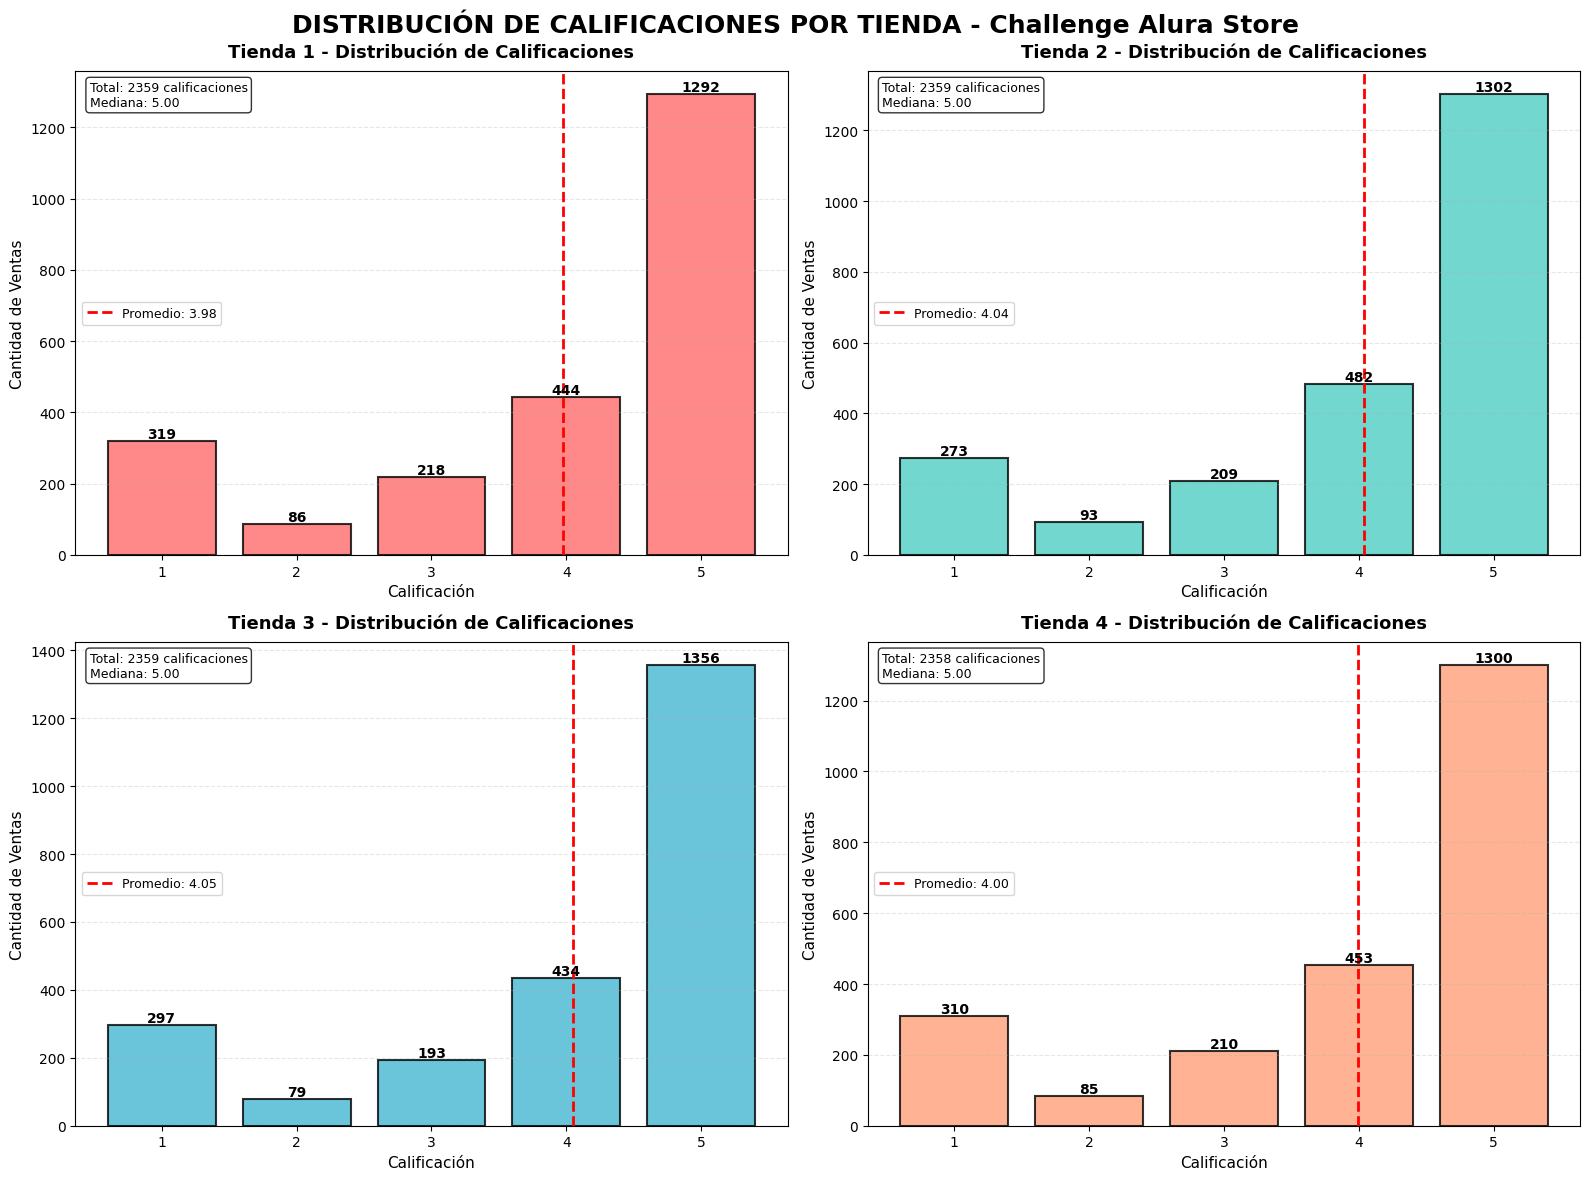

In [12]:
# Visualización 2: Distribución de calificaciones por tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA - Challenge Alura Store',
             fontsize=18, fontweight='bold')
axes = axes.flatten()

for idx, resultado in enumerate(resultados_calificaciones):
    ax = axes[idx]
    dist = resultado['distribucion']

    # Gráfico de barras
    bars = ax.bar(dist.index, dist.values, color=colores[idx],
                  edgecolor='black', linewidth=1.5, alpha=0.8)

    ax.set_title(f'{resultado["Tienda"]} - Distribución de Calificaciones',
                 fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Calificación', fontsize=11)
    ax.set_ylabel('Cantidad de Ventas', fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Agregar valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Agregar línea de promedio
    promedio = resultado['Calificacion_Promedio']
    ax.axvline(x=promedio, color='red', linestyle='--', linewidth=2,
               label=f'Promedio: {promedio:.2f}')
    ax.legend(fontsize=9)

    # Información adicional
    total = resultado['Total_Calificaciones']
    info_text = f"Total: {total} calificaciones\nMediana: {resultado['Calificacion_Mediana']:.2f}"
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [13]:
# Análisis final y conclusiones
print("\n" + "="*80)
print("=== ANÁLISIS DE RESULTADOS ===\n")

# Identificar mejor y peor tienda
idx_mejor = df_calificaciones['Calificacion_Promedio'].idxmax()
idx_peor = df_calificaciones['Calificacion_Promedio'].idxmin()

mejor_tienda = df_calificaciones.loc[idx_mejor]
peor_tienda = df_calificaciones.loc[idx_peor]

print("✓ TIENDA CON MEJOR CALIFICACIÓN:")
print(f"  • {mejor_tienda['Tienda']}")
print(f"  • Calificación Promedio: {mejor_tienda['Calificacion_Promedio']:.2f}")
print(f"  • Calificación Mediana: {mejor_tienda['Calificacion_Mediana']:.2f}")
print(f"  • Desviación Estándar: {mejor_tienda['Desviacion_Estandar']:.2f} (consistencia)")

print(f"\n⚠️ TIENDA CON PEOR CALIFICACIÓN:")
print(f"  • {peor_tienda['Tienda']}")
print(f"  • Calificación Promedio: {peor_tienda['Calificacion_Promedio']:.2f}")
print(f"  • Calificación Mediana: {peor_tienda['Calificacion_Mediana']:.2f}")
print(f"  • Desviación Estándar: {peor_tienda['Desviacion_Estandar']:.2f} (consistencia)")

diferencia = mejor_tienda['Calificacion_Promedio'] - peor_tienda['Calificacion_Promedio']
print(f"\n📊 DIFERENCIA: {diferencia:.2f} puntos entre la mejor y peor tienda")

# Análisis de consistencia
idx_mas_consistente = df_calificaciones['Desviacion_Estandar'].idxmin()
tienda_consistente = df_calificaciones.loc[idx_mas_consistente]

print(f"\n📈 TIENDA MÁS CONSISTENTE (menor variación en calificaciones):")
print(f"  • {tienda_consistente['Tienda']}")
print(f"  • Desviación Estándar: {tienda_consistente['Desviacion_Estandar']:.2f}")
print(f"  • Esto indica que sus clientes califican de manera más uniforme")

print("\n" + "="*80)


=== ANÁLISIS DE RESULTADOS ===

✓ TIENDA CON MEJOR CALIFICACIÓN:
  • Tienda 3
  • Calificación Promedio: 4.05
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.39 (consistencia)

⚠️ TIENDA CON PEOR CALIFICACIÓN:
  • Tienda 1
  • Calificación Promedio: 3.98
  • Calificación Mediana: 5.00
  • Desviación Estándar: 1.42 (consistencia)

📊 DIFERENCIA: 0.07 puntos entre la mejor y peor tienda

📈 TIENDA MÁS CONSISTENTE (menor variación en calificaciones):
  • Tienda 2
  • Desviación Estándar: 1.36
  • Esto indica que sus clientes califican de manera más uniforme



# 4. Productos más y menos vendidos

In [20]:
print("=== ANÁLISIS DE PRODUCTOS ===\n")

resultados_productos = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    # Buscar columna de producto
    columnas_prod = [col for col in df.columns if any(palabra in col.lower()
                    for palabra in ['producto', 'product', 'item', 'articulo'])]

    if columnas_prod:
        col_prod = columnas_prod[0]

        # Contar productos vendidos
        productos_vendidos = df[col_prod].value_counts()

        top_5 = productos_vendidos.head(5)
        bottom_5 = productos_vendidos.tail(5)

        print(f"Tienda {i}:")
        print(f"  Total de productos únicos: {len(productos_vendidos)}")
        print(f"\n  TOP 5 MÁS VENDIDOS:")
        for idx, (prod, cant) in enumerate(top_5.items(), 1):
            print(f"    {idx}. {prod}: {cant} ventas")

        print(f"\n  TOP 5 MENOS VENDIDOS:")
        for idx, (prod, cant) in enumerate(bottom_5.items(), 1):
            print(f"    {idx}. {prod}: {cant} ventas")
        print("\n" + "="*60 + "\n")

        resultados_productos.append({
            'tienda': i,
            'top_5': top_5,
            'bottom_5': bottom_5,
            'total_unicos': len(productos_vendidos)
        })

=== ANÁLISIS DE PRODUCTOS ===

Tienda 1:
  Total de productos únicos: 51

  TOP 5 MÁS VENDIDOS:
    1. Microondas: 60 ventas
    2. TV LED UHD 4K: 60 ventas
    3. Armario: 60 ventas
    4. Secadora de ropa: 58 ventas
    5. Mesa de noche: 56 ventas

  TOP 5 MENOS VENDIDOS:
    1. Ciencia de datos con Python: 39 ventas
    2. Pandereta: 36 ventas
    3. Olla de presión: 35 ventas
    4. Auriculares con micrófono: 33 ventas
    5. Celular ABXY: 33 ventas


Tienda 2:
  Total de productos únicos: 51

  TOP 5 MÁS VENDIDOS:
    1. Iniciando en programación: 65 ventas
    2. Microondas: 62 ventas
    3. Batería: 61 ventas
    4. Guitarra acústica: 58 ventas
    5. Pandereta: 58 ventas

  TOP 5 MENOS VENDIDOS:
    1. Auriculares: 37 ventas
    2. Sillón: 35 ventas
    3. Mesa de comedor: 34 ventas
    4. Impresora: 34 ventas
    5. Juego de mesa: 32 ventas


Tienda 3:
  Total de productos únicos: 51

  TOP 5 MÁS VENDIDOS:
    1. Kit de bancas: 57 ventas
    2. Mesa de comedor: 56 ventas
    3

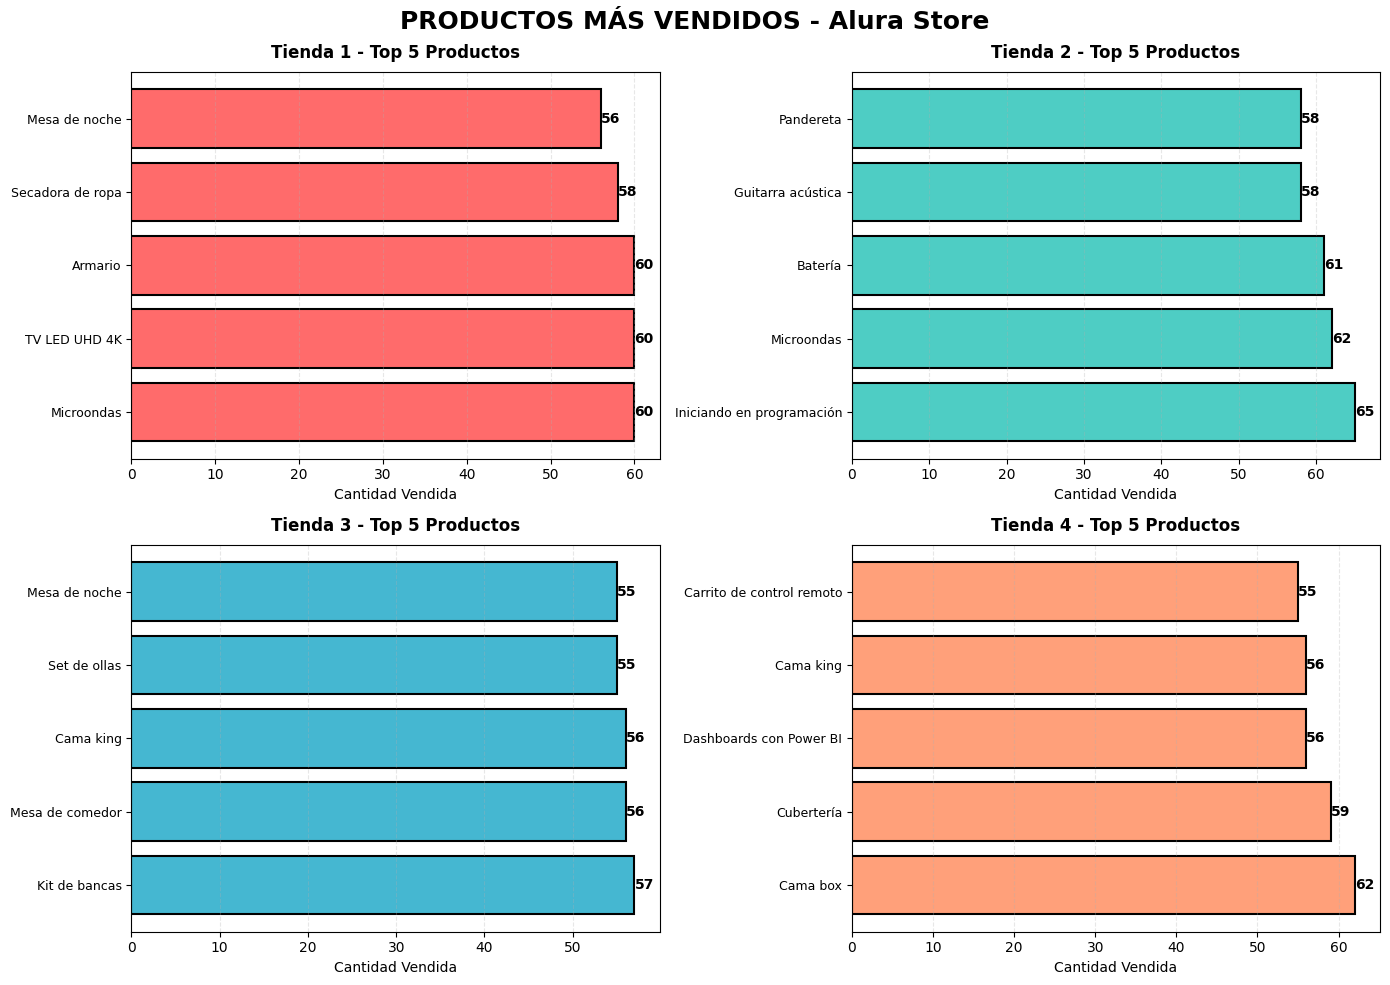

In [21]:
# Visualización de productos más vendidos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('PRODUCTOS MÁS VENDIDOS - Alura Store', fontsize=18, fontweight='bold')

colores_prod = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, resultado in enumerate(resultados_productos):
    ax = axes[idx // 2, idx % 2]

    top = resultado['top_5']

    # Acortar nombres largos
    nombres = [nombre[:30] + '...' if len(nombre) > 30 else nombre
               for nombre in top.index]

    bars = ax.barh(range(len(top)), top.values,
                   color=colores_prod[idx], edgecolor='black', linewidth=1.5)
    ax.set_yticks(range(len(top)))
    ax.set_yticklabels(nombres, fontsize=9)
    ax.set_xlabel('Cantidad Vendida', fontsize=10)
    ax.set_title(f'Tienda {resultado["tienda"]} - Top 5 Productos',
                 fontsize=12, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2., f'{int(width)}',
                ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

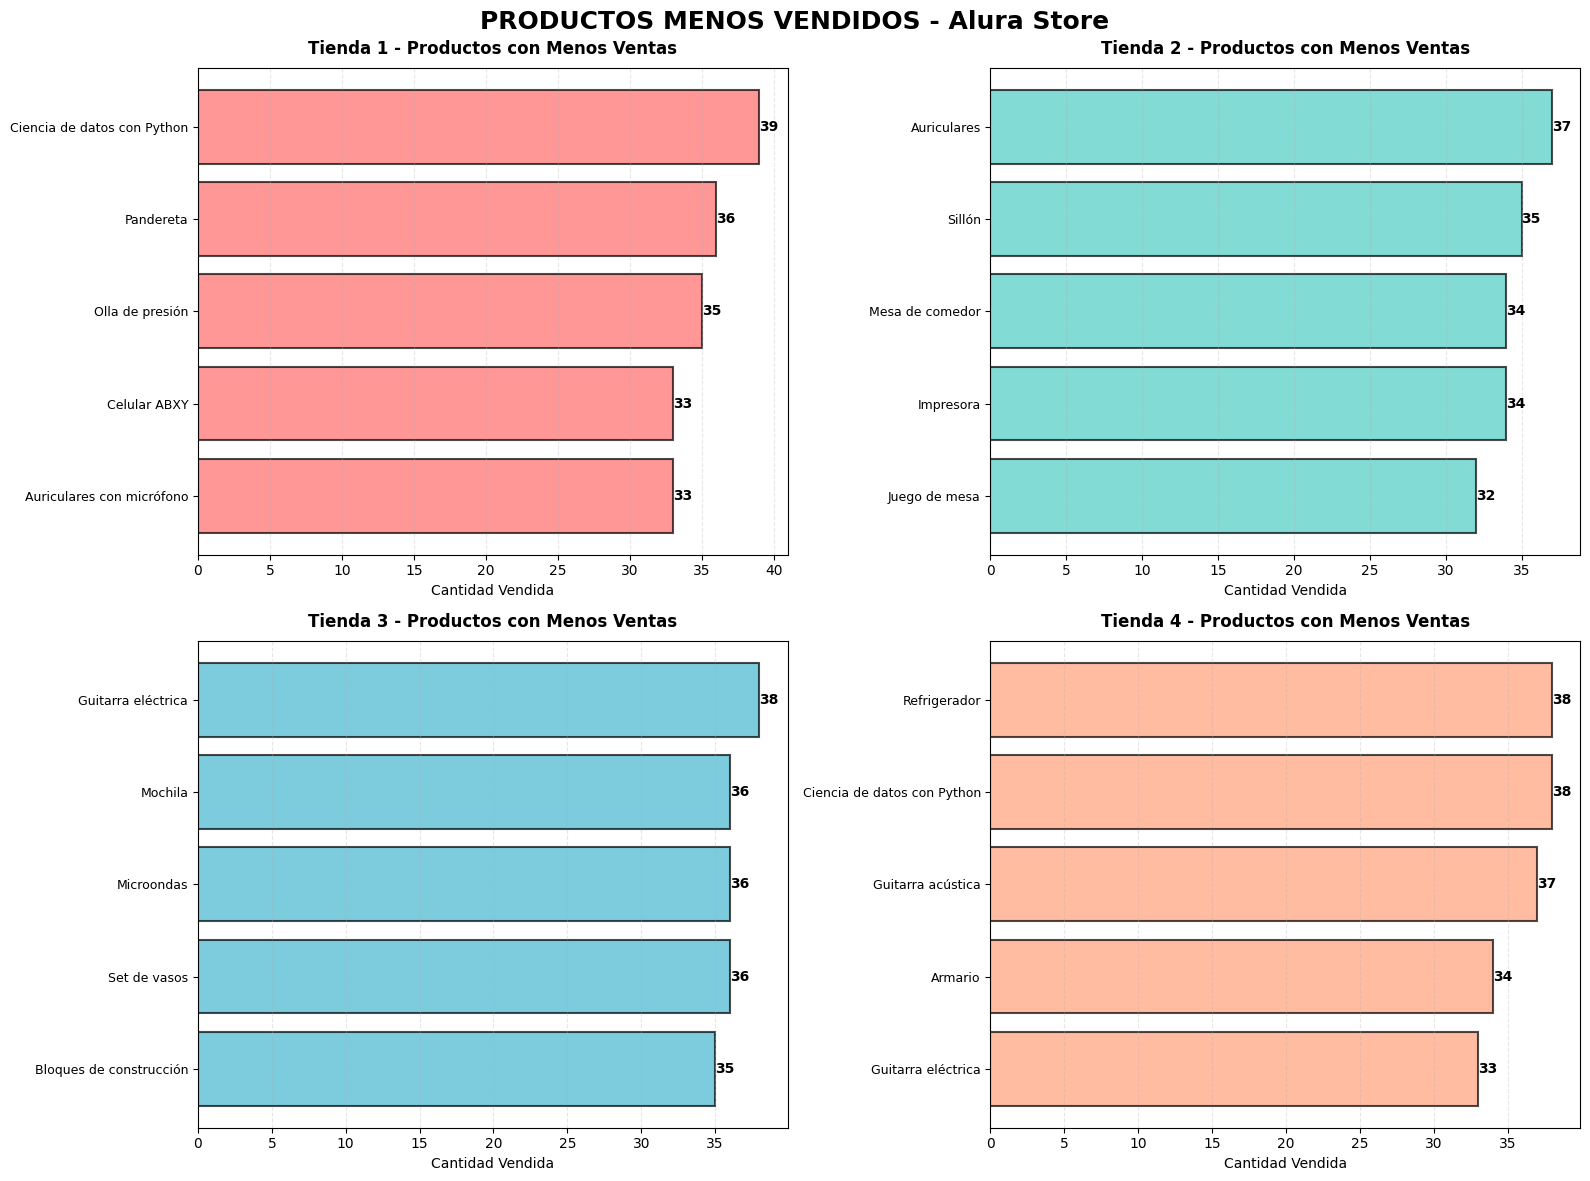

In [22]:
# Visualización de productos menos vendidos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('PRODUCTOS MENOS VENDIDOS - Alura Store', fontsize=18, fontweight='bold')

for idx, resultado in enumerate(resultados_productos):
    ax = axes[idx // 2, idx % 2]

    bottom = resultado['bottom_5'].sort_values()

    nombres = [nombre[:30] + '...' if len(nombre) > 30 else nombre
               for nombre in bottom.index]

    bars = ax.barh(range(len(bottom)), bottom.values,
                   color=colores_prod[idx], edgecolor='black', linewidth=1.5, alpha=0.7)
    ax.set_yticks(range(len(bottom)))
    ax.set_yticklabels(nombres, fontsize=9)
    ax.set_xlabel('Cantidad Vendida', fontsize=10)
    ax.set_title(f'Tienda {resultado["tienda"]} - Productos con Menos Ventas',
                 fontsize=12, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2., f'{int(width)}',
                ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [23]:
print("=== ANÁLISIS DE COSTOS DE ENVÍO ===\n")

resultados_envio = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    # Buscar columna de envío
    columnas_envio = [col for col in df.columns if any(palabra in col.lower()
                     for palabra in ['envio', 'envío', 'shipping', 'flete'])]

    if columnas_envio:
        col_envio = columnas_envio[0]

        envio_promedio = df[col_envio].mean()
        envio_mediano = df[col_envio].median()
        envio_min = df[col_envio].min()
        envio_max = df[col_envio].max()
        envio_total = df[col_envio].sum()

        resultados_envio.append({
            'Tienda': f'Tienda {i}',
            'Envío Promedio': envio_promedio,
            'Envío Mediano': envio_mediano,
            'Envío Mínimo': envio_min,
            'Envío Máximo': envio_max,
            'Costo Total Envíos': envio_total
        })

        print(f"Tienda {i}:")
        print(f"  - Envío Promedio: ${envio_promedio:.2f}")
        print(f"  - Envío Mediano: ${envio_mediano:.2f}")
        print(f"  - Rango: ${envio_min:.2f} - ${envio_max:.2f}")
        print(f"  - Costo Total en Envíos: ${envio_total:,.2f}\n")

df_envio = pd.DataFrame(resultados_envio)
print("\n=== RESUMEN COMPARATIVO DE ENVÍOS ===")
print(df_envio)

=== ANÁLISIS DE COSTOS DE ENVÍO ===

Tienda 1:
  - Envío Promedio: $26018.61
  - Envío Mediano: $12400.00
  - Rango: $0.00 - $160800.00
  - Costo Total en Envíos: $61,377,900.00

Tienda 2:
  - Envío Promedio: $25216.24
  - Envío Mediano: $11600.00
  - Rango: $0.00 - $162500.00
  - Costo Total en Envíos: $59,485,100.00

Tienda 3:
  - Envío Promedio: $24805.68
  - Envío Mediano: $11900.00
  - Rango: $0.00 - $158400.00
  - Costo Total en Envíos: $58,516,600.00

Tienda 4:
  - Envío Promedio: $23459.46
  - Envío Mediano: $10950.00
  - Rango: $0.00 - $154700.00
  - Costo Total en Envíos: $55,317,400.00


=== RESUMEN COMPARATIVO DE ENVÍOS ===
     Tienda  Envío Promedio  Envío Mediano  Envío Mínimo  Envío Máximo  \
0  Tienda 1    26018.609580        12400.0           0.0      160800.0   
1  Tienda 2    25216.235693        11600.0           0.0      162500.0   
2  Tienda 3    24805.680373        11900.0           0.0      158400.0   
3  Tienda 4    23459.457167        10950.0           0.0    

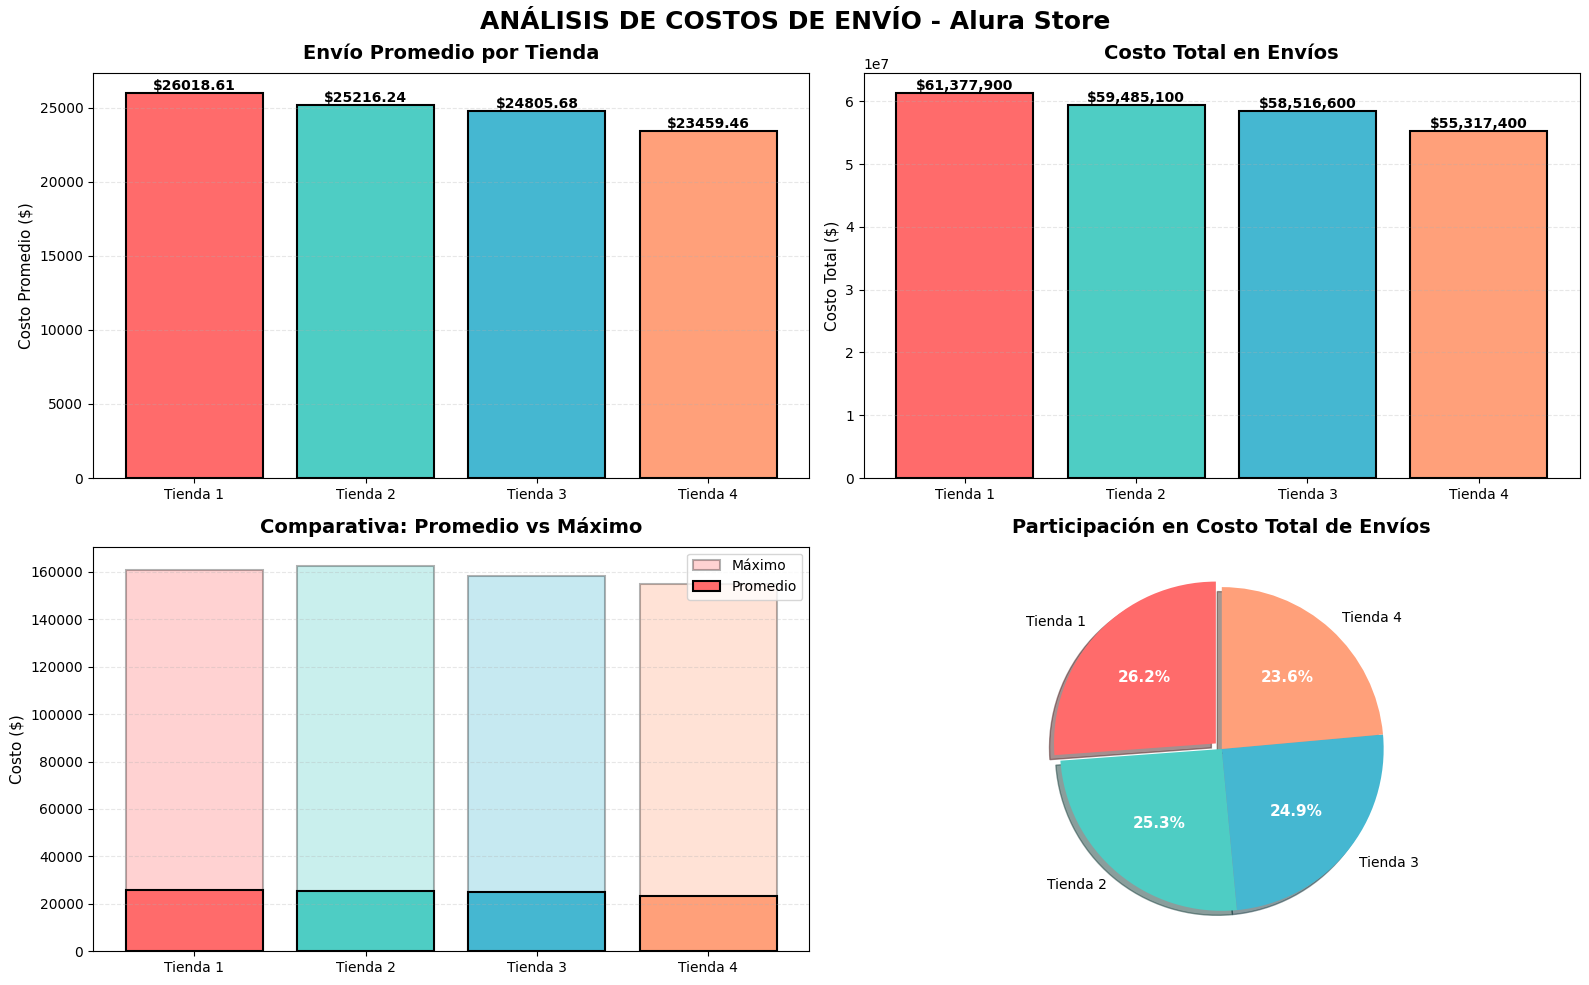


⚠️ TIENDA CON MAYOR COSTO DE ENVÍO PROMEDIO: Tienda 1
   Envío Promedio: $26018.61


In [24]:
# Visualización de costos de envío
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ANÁLISIS DE COSTOS DE ENVÍO - Alura Store', fontsize=18, fontweight='bold')

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Gráfico 1: Envío promedio
ax1 = axes[0, 0]
bars = ax1.bar(df_envio['Tienda'], df_envio['Envío Promedio'],
               color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Envío Promedio por Tienda', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Costo Promedio ($)', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Costo total en envíos
ax2 = axes[0, 1]
bars2 = ax2.bar(df_envio['Tienda'], df_envio['Costo Total Envíos'],
                color=colores, edgecolor='black', linewidth=1.5)
ax2.set_title('Costo Total en Envíos', fontsize=14, fontweight='bold', pad=10)
ax2.set_ylabel('Costo Total ($)', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 3: Comparativa de rangos (box plot simulado)
ax3 = axes[1, 0]
x_pos = np.arange(len(df_envio))
ax3.bar(x_pos, df_envio['Envío Máximo'], color=colores, alpha=0.3,
        edgecolor='black', linewidth=1.5, label='Máximo')
ax3.bar(x_pos, df_envio['Envío Promedio'], color=colores,
        edgecolor='black', linewidth=1.5, label='Promedio')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(df_envio['Tienda'])
ax3.set_title('Comparativa: Promedio vs Máximo', fontsize=14, fontweight='bold', pad=10)
ax3.set_ylabel('Costo ($)', fontsize=11)
ax3.legend()
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 4: Participación en costo total de envíos (Pie)
ax4 = axes[1, 1]
explode = [0.05 if i == df_envio['Costo Total Envíos'].argmax() else 0
           for i in range(len(df_envio))]
wedges, texts, autotexts = ax4.pie(df_envio['Costo Total Envíos'],
                                     labels=df_envio['Tienda'], autopct='%1.1f%%',
                                     colors=colores, explode=explode,
                                     shadow=True, startangle=90)
ax4.set_title('Participación en Costo Total de Envíos', fontsize=14, fontweight='bold', pad=10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

# Identificar tienda con mayor costo de envío
tienda_max_envio = df_envio.loc[df_envio['Envío Promedio'].idxmax()]
print(f"\n⚠️ TIENDA CON MAYOR COSTO DE ENVÍO PROMEDIO: {tienda_max_envio['Tienda']}")
print(f"   Envío Promedio: ${tienda_max_envio['Envío Promedio']:.2f}")

# 6. **INFORME FINAL Y RECOMENDACIÓN**

In [25]:
print("="*80)
print("GENERANDO INFORME FINAL - CONSOLIDACIÓN DE DATOS")
print("="*80 + "\n")

# Consolidar todos los resultados en un DataFrame único
informe_consolidado = pd.DataFrame()

# 1. Datos de Facturación
if 'df_facturacion' in globals():
    informe_consolidado = df_facturacion[['Tienda', 'Facturación Total', 'Número de Ventas', 'Ticket Promedio']].copy()
    print("✓ Datos de facturación consolidados")
else:
    print("⚠️ No se encontraron datos de facturación")

# 2. Datos de Calificaciones
if 'df_calificaciones' in globals():
    calificaciones_temp = df_calificaciones[['Tienda', 'Calificacion_Promedio', 'Desviacion_Estandar']].copy()
    calificaciones_temp.columns = ['Tienda', 'Calificación Promedio', 'Consistencia (Desv. Est.)']
    informe_consolidado = informe_consolidado.merge(calificaciones_temp, on='Tienda', how='left')
    print("✓ Datos de calificaciones consolidados")
else:
    print("⚠️ No se encontraron datos de calificaciones")

# 3. Datos de Envío
if 'df_envio' in globals():
    envio_temp = df_envio[['Tienda', 'Envío Promedio', 'Costo Total Envíos']].copy()
    informe_consolidado = informe_consolidado.merge(envio_temp, on='Tienda', how='left')
    print("✓ Datos de envío consolidados")
else:
    print("⚠️ No se encontraron datos de envío")

# 4. Datos de Categorías
if 'resultados_categorias' in globals() and len(resultados_categorias) > 0:
    categorias_info = []
    for resultado in resultados_categorias:
        categorias_info.append({
            'Tienda': f'Tienda {resultado["tienda"]}',
            'Categorías Únicas': len(resultado['ventas']),
            'Categoría Top': resultado['ventas'].index[0]
        })
    categorias_df = pd.DataFrame(categorias_info)
    informe_consolidado = informe_consolidado.merge(categorias_df, on='Tienda', how='left')
    print("✓ Datos de categorías consolidados")
else:
    print("⚠️ No se encontraron datos de categorías")

# 5. Datos de Productos
if 'resultados_productos' in globals() and len(resultados_productos) > 0:
    productos_info = []
    for resultado in resultados_productos:
        productos_info.append({
            'Tienda': f'Tienda {resultado["tienda"]}',
            'Productos Únicos': resultado['total_unicos'],
            'Producto Top': resultado['top_5'].index[0],
            'Ventas Producto Top': resultado['top_5'].values[0]
        })
    productos_df = pd.DataFrame(productos_info)
    informe_consolidado = informe_consolidado.merge(productos_df, on='Tienda', how='left')
    print("✓ Datos de productos consolidados")
else:
    print("⚠️ No se encontraron datos de productos")

print("\n" + "="*80)
print("TABLA CONSOLIDADA DE TODAS LAS MÉTRICAS")
print("="*80 + "\n")
print(informe_consolidado.to_string(index=False))
print("\n")

GENERANDO INFORME FINAL - CONSOLIDACIÓN DE DATOS

✓ Datos de facturación consolidados
✓ Datos de calificaciones consolidados
✓ Datos de envío consolidados
✓ Datos de categorías consolidados
✓ Datos de productos consolidados

TABLA CONSOLIDADA DE TODAS LAS MÉTRICAS

  Tienda  Facturación Total  Número de Ventas  Ticket Promedio  Calificación Promedio  Consistencia (Desv. Est.)  Envío Promedio  Costo Total Envíos  Categorías Únicas Categoría Top  Productos Únicos              Producto Top  Ventas Producto Top
Tienda 1       1150880400.0              2359    487867.910131               3.976685                   1.415370    26018.609580          61377900.0                  8       Muebles                51                Microondas                   60
Tienda 2       1116343500.0              2359    473227.426876               4.037304                   1.356153    25216.235693          59485100.0                  8       Muebles                51 Iniciando en programación               

In [26]:
print("="*80)
print("SISTEMA DE EVALUACIÓN Y PUNTUACIÓN")
print("="*80 + "\n")

# Crear DataFrame de puntuación
puntuacion = pd.DataFrame()
puntuacion['Tienda'] = informe_consolidado['Tienda']

# 1. Puntuación por Facturación (0-10 puntos)
# Menor facturación = Mejor candidata para vender (puntaje más alto)
if 'Facturación Total' in informe_consolidado.columns:
    facturacion_min = informe_consolidado['Facturación Total'].min()
    facturacion_max = informe_consolidado['Facturación Total'].max()
    # Invertir la escala: menor facturación = mayor puntaje
    puntuacion['Pts_Facturación'] = 10 - ((informe_consolidado['Facturación Total'] - facturacion_min) /
                                           (facturacion_max - facturacion_min) * 10)
    print("✓ Puntuación por facturación calculada (menor facturación = más puntos)")
else:
    puntuacion['Pts_Facturación'] = 0

# 2. Puntuación por Calificación (0-10 puntos)
# Peor calificación = Mejor candidata para vender (puntaje más alto)
if 'Calificación Promedio' in informe_consolidado.columns:
    calif_min = informe_consolidado['Calificación Promedio'].min()
    calif_max = informe_consolidado['Calificación Promedio'].max()
    # Invertir: peor calificación = mayor puntaje
    puntuacion['Pts_Calificación'] = 10 - ((informe_consolidado['Calificación Promedio'] - calif_min) /
                                            (calif_max - calif_min) * 10)
    print("✓ Puntuación por calificación calculada (peor calificación = más puntos)")
else:
    puntuacion['Pts_Calificación'] = 0

# 3. Puntuación por Número de Ventas (0-10 puntos)
# Menos ventas = Mejor candidata para vender
if 'Número de Ventas' in informe_consolidado.columns:
    ventas_min = informe_consolidado['Número de Ventas'].min()
    ventas_max = informe_consolidado['Número de Ventas'].max()
    puntuacion['Pts_Ventas'] = 10 - ((informe_consolidado['Número de Ventas'] - ventas_min) /
                                      (ventas_max - ventas_min) * 10)
    print("✓ Puntuación por volumen de ventas calculada (menos ventas = más puntos)")
else:
    puntuacion['Pts_Ventas'] = 0

# 4. Puntuación por Costo de Envío (0-10 puntos)
# Mayor costo de envío = problema operativo = más puntos
if 'Envío Promedio' in informe_consolidado.columns:
    envio_min = informe_consolidado['Envío Promedio'].min()
    envio_max = informe_consolidado['Envío Promedio'].max()
    puntuacion['Pts_Envío'] = ((informe_consolidado['Envío Promedio'] - envio_min) /
                                (envio_max - envio_min) * 10)
    print("✓ Puntuación por costo de envío calculada (mayor costo = más puntos)")
else:
    puntuacion['Pts_Envío'] = 0

# 5. Puntuación por Consistencia (0-5 puntos)
# Mayor desviación = más inconsistente = más puntos
if 'Consistencia (Desv. Est.)' in informe_consolidado.columns:
    consist_min = informe_consolidado['Consistencia (Desv. Est.)'].min()
    consist_max = informe_consolidado['Consistencia (Desv. Est.)'].max()
    puntuacion['Pts_Consistencia'] = ((informe_consolidado['Consistencia (Desv. Est.)'] - consist_min) /
                                       (consist_max - consist_min) * 5)
    print("✓ Puntuación por consistencia calculada (más inconsistente = más puntos)")
else:
    puntuacion['Pts_Consistencia'] = 0

# Calcular puntuación total (máximo 45 puntos)
puntuacion['PUNTUACIÓN TOTAL'] = (puntuacion['Pts_Facturación'] +
                                   puntuacion['Pts_Calificación'] +
                                   puntuacion['Pts_Ventas'] +
                                   puntuacion['Pts_Envío'] +
                                   puntuacion['Pts_Consistencia'])

# Ordenar por puntuación
puntuacion = puntuacion.sort_values('PUNTUACIÓN TOTAL', ascending=False)

print("\n" + "="*80)
print("TABLA DE PUNTUACIÓN (Mayor puntaje = Mejor candidata para vender)")
print("="*80 + "\n")
print(puntuacion.round(2).to_string(index=False))
print("\n")

# Identificar la tienda recomendada
tienda_vender = puntuacion.iloc[0]['Tienda']
puntaje_max = puntuacion.iloc[0]['PUNTUACIÓN TOTAL']

print("="*80)
print(f"🎯 TIENDA RECOMENDADA PARA VENDER: {tienda_vender}")
print(f"   Puntuación: {puntaje_max:.2f} / 45 puntos")
print("="*80 + "\n")

SISTEMA DE EVALUACIÓN Y PUNTUACIÓN

✓ Puntuación por facturación calculada (menor facturación = más puntos)
✓ Puntuación por calificación calculada (peor calificación = más puntos)
✓ Puntuación por volumen de ventas calculada (menos ventas = más puntos)
✓ Puntuación por costo de envío calculada (mayor costo = más puntos)
✓ Puntuación por consistencia calculada (más inconsistente = más puntos)

TABLA DE PUNTUACIÓN (Mayor puntaje = Mejor candidata para vender)

  Tienda  Pts_Facturación  Pts_Calificación  Pts_Ventas  Pts_Envío  Pts_Consistencia  PUNTUACIÓN TOTAL
Tienda 4            10.00              7.34        10.0       0.00              3.96             31.30
Tienda 1             0.00             10.00         0.0      10.00              5.00             25.00
Tienda 3             4.70              0.00         0.0       5.26              2.56             12.52
Tienda 2             3.07              1.54         0.0       6.86              0.00             11.47


🎯 TIENDA RECOMENDAD

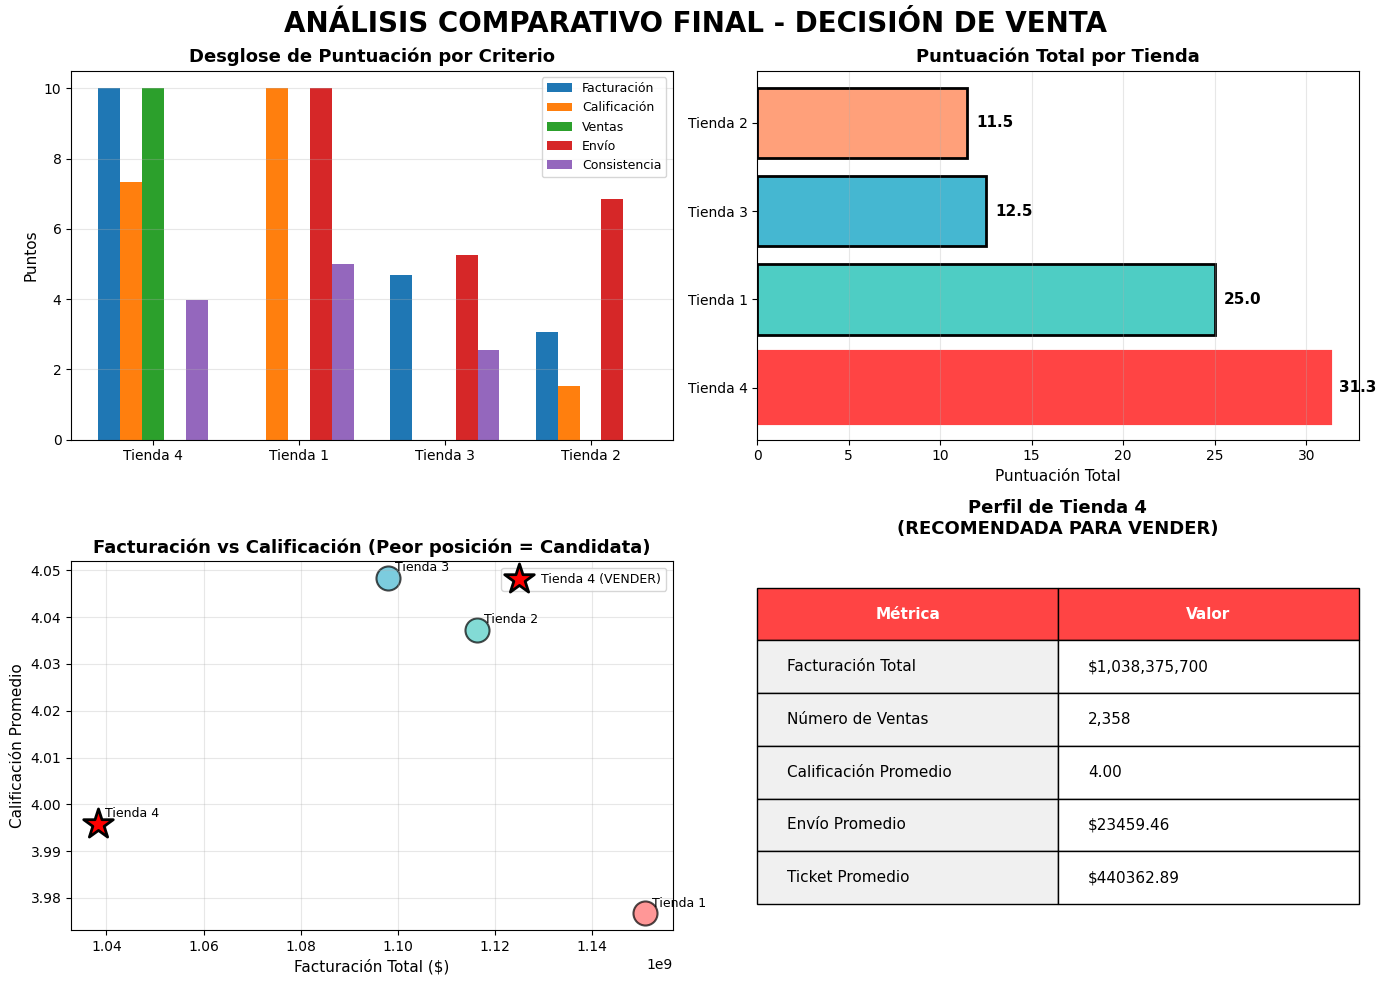

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ANÁLISIS COMPARATIVO FINAL - DECISIÓN DE VENTA', fontsize=20, fontweight='bold')

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
tiendas = puntuacion['Tienda'].values

# Gráfico 1: Puntuación Total por Categoría
ax1 = axes[0, 0]
categorias_puntos = ['Facturación', 'Calificación', 'Ventas', 'Envío', 'Consistencia']
x = np.arange(len(tiendas))
width = 0.15

for i, categoria in enumerate(categorias_puntos):
    col_name = f'Pts_{categoria}'
    if col_name in puntuacion.columns:
        offset = width * (i - 2)
        ax1.bar(x + offset, puntuacion[col_name], width, label=categoria)

ax1.set_ylabel('Puntos', fontsize=11)
ax1.set_title('Desglose de Puntuación por Criterio', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(tiendas, fontsize=10)
ax1.legend(fontsize=9, loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Puntuación Total
ax2 = axes[0, 1]
bars = ax2.barh(tiendas, puntuacion['PUNTUACIÓN TOTAL'], color=colores, edgecolor='black', linewidth=2)
ax2.set_xlabel('Puntuación Total', fontsize=11)
ax2.set_title('Puntuación Total por Tienda', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Destacar la tienda recomendada
bars[0].set_color('#FF4444')
bars[0].set_linewidth(3)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2., f'{width:.1f}',
            ha='left', va='center', fontsize=11, fontweight='bold')

# Gráfico 3: Facturación vs Calificación
ax3 = axes[1, 0]
if 'Facturación Total' in informe_consolidado.columns and 'Calificación Promedio' in informe_consolidado.columns:
    for i, tienda in enumerate(informe_consolidado['Tienda']):
        x_val = informe_consolidado.loc[informe_consolidado['Tienda']==tienda, 'Facturación Total'].values[0]
        y_val = informe_consolidado.loc[informe_consolidado['Tienda']==tienda, 'Calificación Promedio'].values[0]

        if tienda == tienda_vender:
            ax3.scatter(x_val, y_val, s=500, c='red', marker='*', edgecolors='black',
                       linewidths=2, label=f'{tienda} (VENDER)', zorder=5)
        else:
            ax3.scatter(x_val, y_val, s=300, c=colores[i], marker='o', edgecolors='black',
                       linewidths=1.5, alpha=0.7)

        ax3.annotate(tienda, (x_val, y_val), xytext=(5, 5), textcoords='offset points', fontsize=9)

    ax3.set_xlabel('Facturación Total ($)', fontsize=11)
    ax3.set_ylabel('Calificación Promedio', fontsize=11)
    ax3.set_title('Facturación vs Calificación (Peor posición = Candidata)', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=9)

# Gráfico 4: Radar comparativo de la tienda recomendada
ax4 = axes[1, 1]
ax4.axis('off')

# Crear tabla resumen de la tienda recomendada
tienda_idx = informe_consolidado[informe_consolidado['Tienda'] == tienda_vender].index[0]
resumen = []

if 'Facturación Total' in informe_consolidado.columns:
    resumen.append(['Facturación Total', f"${informe_consolidado.loc[tienda_idx, 'Facturación Total']:,.0f}"])
if 'Número de Ventas' in informe_consolidado.columns:
    resumen.append(['Número de Ventas', f"{int(informe_consolidado.loc[tienda_idx, 'Número de Ventas']):,}"])
if 'Calificación Promedio' in informe_consolidado.columns:
    resumen.append(['Calificación Promedio', f"{informe_consolidado.loc[tienda_idx, 'Calificación Promedio']:.2f}"])
if 'Envío Promedio' in informe_consolidado.columns:
    resumen.append(['Envío Promedio', f"${informe_consolidado.loc[tienda_idx, 'Envío Promedio']:.2f}"])
if 'Ticket Promedio' in informe_consolidado.columns:
    resumen.append(['Ticket Promedio', f"${informe_consolidado.loc[tienda_idx, 'Ticket Promedio']:.2f}"])

table = ax4.table(cellText=resumen, colLabels=['Métrica', 'Valor'],
                  cellLoc='left', loc='center',
                  colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

# Estilo de la tabla
for i in range(len(resumen) + 1):
    if i == 0:
        table[(i, 0)].set_facecolor('#FF4444')
        table[(i, 1)].set_facecolor('#FF4444')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#f0f0f0')

ax4.set_title(f'Perfil de {tienda_vender}\n(RECOMENDADA PARA VENDER)',
             fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [43]:
print("\n" + "="*80)
print("INFORME FINAL DE ANÁLISIS Y RECOMENDACIÓN")
print("="*80 + "\n")

informe_texto = f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    ANÁLISIS DE TIENDAS - Challenge ALURA STORE                         ║
║              Recomendación de Venta para el Sr. Juan                         ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. INTRODUCCIÓN
───────────────

El presente informe tiene como objetivo analizar el desempeño de las 4 tiendas
de la cadena para determinar cuál de ellas debería ser vendida para
iniciar un nuevo emprendimiento. El análisis se basa en múltiples métricas clave
de negocio que incluyen facturación, calificaciones de clientes, volumen de
ventas, costos operativos y diversidad de productos.


2. METODOLOGÍA
──────────────

Se evaluaron las siguientes dimensiones:

- Facturación Total: Ingresos generados por cada tienda
- Calificaciones Promedio: Satisfacción del cliente (escala 1-5)
- Volumen de Ventas: Cantidad de transacciones realizadas
- Costos de Envío: Gastos logísticos promedio
- Diversidad de Producto: Categorías y productos únicos ofrecidos
- Consistencia: Variabilidad en las calificaciones (desviación estándar)

Se implementó un sistema de puntuación ponderado donde las tiendas con PEOR
desempeño reciben MAYOR puntaje, ya que son las candidatas ideales para vender.


3. RESULTADOS DEL ANÁLISIS
───────────────────────────

RANKING DE PUNTUACIÓN (Mayor puntaje = Mejor candidata para vender):

"""

# Agregar tabla de puntuación
for idx, row in puntuacion.iterrows():
    posicion = idx + 1
    if posicion == 1:
        informe_texto += f"🥇 {row['Tienda']}: {row['PUNTUACIÓN TOTAL']:.2f} puntos ⭐ RECOMENDADA\n"
    elif posicion == 2:
        informe_texto += f"🥈 {row['Tienda']}: {row['PUNTUACIÓN TOTAL']:.2f} puntos\n"
    elif posicion == 3:
        informe_texto += f"🥉 {row['Tienda']}: {row['PUNTUACIÓN TOTAL']:.2f} puntos\n"
    else:
        informe_texto += f"{posicion}. {row['Tienda']}: {row['PUNTUACIÓN TOTAL']:.2f} puntos\n"

informe_texto += f"""

MÉTRICAS DETALLADAS DE {tienda_vender}:
{'─' * 50}
"""

# Agregar métricas de la tienda recomendada
tienda_idx = informe_consolidado[informe_consolidado['Tienda'] == tienda_vender].index[0]

if 'Facturación Total' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Facturación Total']
    ranking_fact = informe_consolidado['Facturación Total'].rank(ascending=True).loc[tienda_idx]
    informe_texto += f"• Facturación Total: ${valor:,.2f} (Posición {int(ranking_fact)} de 4)\n"

if 'Número de Ventas' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Número de Ventas']
    ranking_ventas = informe_consolidado['Número de Ventas'].rank(ascending=True).loc[tienda_idx]
    informe_texto += f"• Número de Ventas: {int(valor):,} (Posición {int(ranking_ventas)} de 4)\n"

if 'Calificación Promedio' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Calificación Promedio']
    ranking_calif = informe_consolidado['Calificación Promedio'].rank(ascending=True).loc[tienda_idx]
    informe_texto += f"• Calificación Promedio: {valor:.2f}/5.0 (Posición {int(ranking_calif)} de 4)\n"

if 'Envío Promedio' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Envío Promedio']
    ranking_envio = informe_consolidado['Envío Promedio'].rank(ascending=False).loc[tienda_idx]
    informe_texto += f"• Envío Promedio: ${valor:.2f} (Posición {int(ranking_envio)} de 4)\n"

if 'Ticket Promedio' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Ticket Promedio']
    informe_texto += f"• Ticket Promedio: ${valor:.2f}\n"

if 'Categoría Top' in informe_consolidado.columns:
    valor = informe_consolidado.loc[tienda_idx, 'Categoría Top']
    informe_texto += f"• Categoría Más Vendida: {valor}\n"

informe_texto += """

4. ANÁLISIS COMPARATIVO
────────────────────────

FORTALEZAS Y DEBILIDADES POR TIENDA:

"""

# Análisis de cada tienda
for idx, row_tienda in informe_consolidado.iterrows():
    nombre_tienda = row_tienda['Tienda']
    informe_texto += f"\n{nombre_tienda}:\n"

    fortalezas = []
    debilidades = []

    # Facturación
    if 'Facturación Total' in informe_consolidado.columns:
        rank = informe_consolidado['Facturación Total'].rank(ascending=False).loc[idx]
        if rank == 1:
            fortalezas.append(f"Mayor facturación (${row_tienda['Facturación Total']:,.0f})")
        elif rank == 4:
            debilidades.append(f"Menor facturación (${row_tienda['Facturación Total']:,.0f})")

    # Calificación
    if 'Calificación Promedio' in informe_consolidado.columns:
        rank = informe_consolidado['Calificación Promedio'].rank(ascending=False).loc[idx]
        if rank == 1:
            fortalezas.append(f"Mejor calificación ({row_tienda['Calificación Promedio']:.2f}/5.0)")
        elif rank == 4:
            debilidades.append(f"Peor calificación ({row_tienda['Calificación Promedio']:.2f}/5.0)")

    # Ventas
    if 'Número de Ventas' in informe_consolidado.columns:
        rank = informe_consolidado['Número de Ventas'].rank(ascending=False).loc[idx]
        if rank == 1:
            fortalezas.append(f"Mayor volumen de ventas ({int(row_tienda['Número de Ventas']):,})")
        elif rank == 4:
            debilidades.append(f"Menor volumen de ventas ({int(row_tienda['Número de Ventas']):,})")

    if fortalezas:
        informe_texto += "  ✓ Fortalezas:\n"
        for f in fortalezas:
            informe_texto += f"    - {f}\n"

    if debilidades:
        informe_texto += "  ✗ Debilidades:\n"
        for d in debilidades:
            informe_texto += f"    - {d}\n"

informe_texto += f"""

5. RECOMENDACIÓN FINAL
──────────────────────

🎯 RECOMENDACIÓN: VENDER {tienda_vender}

JUSTIFICACIÓN:

Basándose en el análisis integral de todas las métricas disponibles, se
recomienda que el Sr. Juan proceda con la venta de {tienda_vender}. Esta
recomendación se fundamenta en los siguientes criterios:

"""

# Justificación personalizada según métricas
justificaciones = []

if 'Facturación Total' in informe_consolidado.columns:
    rank_fact = informe_consolidado['Facturación Total'].rank(ascending=True).loc[tienda_idx]
    if rank_fact <= 2:
        justificaciones.append(
            f"1. RENDIMIENTO FINANCIERO LIMITADO: {tienda_vender} presenta una de las\n"
            f"   facturaciones más bajas de la cadena, lo que indica un menor potencial\n"
            f"   de crecimiento en su ubicación actual."
        )

if 'Calificación Promedio' in informe_consolidado.columns:
    rank_calif = informe_consolidado['Calificación Promedio'].rank(ascending=True).loc[tienda_idx]
    if rank_calif <= 2:
        calif_valor = informe_consolidado.loc[tienda_idx, 'Calificación Promedio']
        justificaciones.append(
            f"2. SATISFACCIÓN DEL CLIENTE: Con una calificación promedio de {calif_valor:.2f}/5.0,\n"
            f"   esta tienda muestra niveles de satisfacción inferiores al resto, lo que\n"
            f"   podría indicar problemas operativos o de servicio difíciles de revertir."
        )

if 'Número de Ventas' in informe_consolidado.columns:
    rank_ventas = informe_consolidado['Número de Ventas'].rank(ascending=True).loc[tienda_idx]
    if rank_ventas <= 2:
        justificaciones.append(
            f"3. VOLUMEN DE OPERACIONES: El menor número de transacciones sugiere una\n"
            f"   ubicación menos favorable o un mercado local menos receptivo, factores\n"
            f"   que son difíciles de modificar sin inversión significativa."
        )

if 'Envío Promedio' in informe_consolidado.columns:
    rank_envio = informe_consolidado['Envío Promedio'].rank(ascending=False).loc[tienda_idx]
    if rank_envio <= 2:
        justificaciones.append(
            f"4. COSTOS OPERATIVOS: Los costos de envío superiores al promedio impactan\n"
            f"   negativamente en los márgenes de ganancia y competitividad de precios."
        )

for justif in justificaciones:
    informe_texto += f"\n{justif}\n"

informe_texto += f"""

PERSPECTIVA ESTRATÉGICA:

La venta de {tienda_vender} permitirá al Sr. Juan:

- Liberar capital de una operación de bajo rendimiento
- Concentrar recursos en las tiendas de mejor desempeño
- Reducir complejidad operativa manteniendo las unidades más rentables
- Obtener liquidez para el nuevo emprendimiento sin comprometer los
  activos estratégicos de la cadena

Las tiendas restantes muestran métricas superiores en facturación, satisfacción
del cliente y eficiencia operativa, lo que las hace más valiosas para mantener
en el portafolio de Alura Store.


6. CONCLUSIÓN
─────────────

El análisis cuantitativo de múltiples dimensiones del negocio converge en la
misma recomendación: {tienda_vender} es la candidata óptima para vender. Esta
decisión maximiza el valor del portafolio retenido mientras proporciona el
capital necesario para el nuevo emprendimiento del Sr. Juan.

Se recomienda proceder con la valoración y venta de esta unidad, manteniendo
el enfoque en fortalecer las operaciones de las tiendas restantes que han
demostrado mayor solidez en el mercado.


╔══════════════════════════════════════════════════════════════════════════════╗
║  Informe generado mediante análisis de datos con Python y Pandas            ║
║  Fecha: {pd.Timestamp.now().strftime('%d/%m/%Y %H:%M')}                                                    ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

print(informe_texto)

# Guardar informe en archivo de texto
with open('informe_recomendacion_alura_store.txt', 'w', encoding='utf-8') as f:
    f.write(informe_texto)

print("\n✓ Informe guardado como 'informe_recomendacion_alura_store.txt'")


INFORME FINAL DE ANÁLISIS Y RECOMENDACIÓN


╔══════════════════════════════════════════════════════════════════════════════╗
║                    ANÁLISIS DE TIENDAS - Challenge ALURA STORE                         ║
║              Recomendación de Venta para el Sr. Juan                         ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. INTRODUCCIÓN
───────────────

El presente informe tiene como objetivo analizar el desempeño de las 4 tiendas
de la cadena para determinar cuál de ellas debería ser vendida para
iniciar un nuevo emprendimiento. El análisis se basa en múltiples métricas clave
de negocio que incluyen facturación, calificaciones de clientes, volumen de
ventas, costos operativos y diversidad de productos.


2. METODOLOGÍA
──────────────

Se evaluaron las siguientes dimensiones:

- Facturación Total: Ingresos generados por cada tienda
- Calificaciones Promedio: Satisfacción del cliente (escala 1-5)
- Volumen de Ventas: Cantidad de t

# 7. **ANÁLISIS GEOGRÁFICO EXTRA - Distribución Espacial de Ventas**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Recargar todos los datasets
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_df1 = pd.read_csv(url)
tienda_df2 = pd.read_csv(url2)
tienda_df3 = pd.read_csv(url3)
tienda_df4 = pd.read_csv(url4)

print("✓ Datos recargados correctamente\n")
print(f"Tienda 1: {tienda_df1.shape}")
print(f"Tienda 2: {tienda_df2.shape}")
print(f"Tienda 3: {tienda_df3.shape}")
print(f"Tienda 4: {tienda_df4.shape}")

✓ Datos recargados correctamente

Tienda 1: (2359, 12)
Tienda 2: (2359, 12)
Tienda 3: (2359, 12)
Tienda 4: (2358, 12)


In [31]:
print("\n" + "="*80)
print("ANÁLISIS GEOGRÁFICO DE VENTAS - ALURA STORE")
print("="*80 + "\n")

# Verificar columnas de coordenadas
print("1. VERIFICACIÓN DE DATOS GEOGRÁFICOS\n")

datos_geo = []

for i, df in enumerate([tienda_df1, tienda_df2, tienda_df3, tienda_df4], 1):
    print(f"--- Tienda {i} ---")

    # Verificar que sea DataFrame
    if not isinstance(df, pd.DataFrame):
        print(f"✗ Error: Los datos no son un DataFrame válido")
        continue

    print(f"Tipo de datos: {type(df)}")
    print(f"Dimensiones: {df.shape}")

    # Buscar columnas de latitud y longitud
    col_lat = None
    col_lon = None

    # Mostrar todas las columnas para debug
    print(f"Columnas disponibles: {df.columns.tolist()}\n")

    for col in df.columns:
        col_lower = str(col).lower()

        # Buscar latitud
        if 'lat' in col_lower and 'relat' not in col_lower and col_lat is None:
            col_lat = col
            print(f"  → Columna de latitud candidata: '{col}'")

        # Buscar longitud
        if ('lon' in col_lower or 'lng' in col_lower) and col_lon is None:
            col_lon = col
            print(f"  → Columna de longitud candidata: '{col}'")

    if col_lat and col_lon:
        print(f"\n✓ Coordenadas confirmadas:")
        print(f"  - Latitud: '{col_lat}'")
        print(f"  - Longitud: '{col_lon}'")

        # Verificar que tengan datos numéricos
        try:
            lat_data = pd.to_numeric(df[col_lat], errors='coerce')
            lon_data = pd.to_numeric(df[col_lon], errors='coerce')

            # Eliminar valores nulos
            valid_coords = ~(lat_data.isna() | lon_data.isna())
            n_valid = valid_coords.sum()

            if n_valid > 0:
                # Estadísticas básicas
                lat_range = (lat_data.min(), lat_data.max())
                lon_range = (lon_data.min(), lon_data.max())

                print(f"\n  Estadísticas:")
                print(f"  - Coordenadas válidas: {n_valid}/{len(df)}")
                print(f"  - Rango Latitud: {lat_range[0]:.4f} a {lat_range[1]:.4f}")
                print(f"  - Rango Longitud: {lon_range[0]:.4f} a {lon_range[1]:.4f}")

                # Ubicaciones únicas
                coords_unicos = df[[col_lat, col_lon]].drop_duplicates().shape[0]
                print(f"  - Ubicaciones únicas: {coords_unicos}")

                datos_geo.append({
                    'tienda': i,
                    'df': df,
                    'col_lat': col_lat,
                    'col_lon': col_lon,
                    'n_valid': n_valid
                })
            else:
                print(f"  ✗ No hay coordenadas válidas")

        except Exception as e:
            print(f"  ✗ Error al procesar coordenadas: {e}")
    else:
        print(f"\n✗ No se encontraron columnas de coordenadas completas")
        if not col_lat:
            print(f"  - Falta columna de latitud")
        if not col_lon:
            print(f"  - Falta columna de longitud")

    print("\n" + "─"*60 + "\n")

print(f"{'='*80}")
print(f"RESUMEN: Tiendas con datos geográficos válidos: {len(datos_geo)}/4")
print(f"{'='*80}\n")

if len(datos_geo) == 0:
    print("⚠️ ADVERTENCIA: No se encontraron datos geográficos en ninguna tienda.")
    print("   Verifica los nombres de las columnas en los datasets.")
    print("\n   Columnas disponibles en Tienda 1:")
    print(f"   {tienda_df1.columns.tolist()}")


ANÁLISIS GEOGRÁFICO DE VENTAS - ALURA STORE

1. VERIFICACIÓN DE DATOS GEOGRÁFICOS

--- Tienda 1 ---
Tipo de datos: <class 'pandas.core.frame.DataFrame'>
Dimensiones: (2359, 12)
Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

  → Columna de latitud candidata: 'lat'
  → Columna de longitud candidata: 'lon'

✓ Coordenadas confirmadas:
  - Latitud: 'lat'
  - Longitud: 'lon'

  Estadísticas:
  - Coordenadas válidas: 2359/2359
  - Rango Latitud: -4.2153 a 11.5444
  - Rango Longitud: -77.2811 a -67.9239
  - Ubicaciones únicas: 19

────────────────────────────────────────────────────────────

--- Tienda 2 ---
Tipo de datos: <class 'pandas.core.frame.DataFrame'>
Dimensiones: (2359, 12)
Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificació

In [37]:
try:
    import folium
    from folium.plugins import HeatMap, MarkerCluster
    print("✓ Folium ya está instalado\n")
except ImportError:
    print("Instalando Folium...")
    !pip install folium -q
    import folium
    from folium.plugins import HeatMap, MarkerCluster
    print("✓ Folium instalado correctamente\n")

import pandas as pd
import numpy as np

✓ Folium ya está instalado



In [38]:
print("="*80)
print("PREPARACIÓN DE MAPAS INTERACTIVOS CON FOLIUM")
print("="*80 + "\n")

# Verificar datos geográficos disponibles
if 'datos_geo' not in globals() or len(datos_geo) == 0:
    print("⚠️ Datos geográficos no encontrados. Ejecutando análisis previo...\n")

    # Usar las variables correctas
    if 'tienda_df1' in globals():
        lista_mapas = [tienda_df1, tienda_df2, tienda_df3, tienda_df4]
    else:
        lista_mapas = [tienda, tienda2, tienda3, tienda4]

    datos_geo = []

    for i, df in enumerate(lista_mapas, 1):
        if not isinstance(df, pd.DataFrame):
            continue

        col_lat = None
        col_lon = None

        for col in df.columns:
            col_lower = str(col).lower()
            if 'lat' in col_lower and 'relat' not in col_lower and col_lat is None:
                col_lat = col
            if ('lon' in col_lower or 'lng' in col_lower) and col_lon is None:
                col_lon = col

        if col_lat and col_lon:
            datos_geo.append({
                'tienda': i,
                'df': df,
                'col_lat': col_lat,
                'col_lon': col_lon
            })

print(f"Tiendas con datos geográficos: {len(datos_geo)}\n")

if len(datos_geo) == 0:
    print("✗ No se encontraron datos geográficos para visualizar")

PREPARACIÓN DE MAPAS INTERACTIVOS CON FOLIUM

Tiendas con datos geográficos: 4



In [41]:
# MAPA 2: HEATMAP OPTIMIZADO CON FOLIUM
# ========================================

if len(datos_geo) > 0:
    print("Generando mapas de calor optimizados...\n")

    for dato in datos_geo:
        tienda_num = dato['tienda']
        df = dato['df']
        col_lat = dato['col_lat']
        col_lon = dato['col_lon']

        # Limpiar datos
        lat_data = pd.to_numeric(df[col_lat], errors='coerce')
        lon_data = pd.to_numeric(df[col_lon], errors='coerce')

        valid_mask = ~(lat_data.isna() | lon_data.isna())
        lat_clean = lat_data[valid_mask].values
        lon_clean = lon_data[valid_mask].values

        if len(lat_clean) == 0:
            continue

        # Preparar datos para heatmap
        heat_data = [[lat, lon] for lat, lon in zip(lat_clean, lon_clean)]

        # Calcular centro
        center_lat = lat_clean.mean()
        center_lon = lon_clean.mean()

        # Calcular zoom
        lat_range = lat_clean.max() - lat_clean.min()
        lon_range = lon_clean.max() - lon_clean.min()
        max_range = max(lat_range, lon_range)

        if max_range > 10:
            zoom_level = 5
        elif max_range > 5:
            zoom_level = 6
        elif max_range > 2:
            zoom_level = 8
        elif max_range > 1:
            zoom_level = 9
        elif max_range > 0.5:
            zoom_level = 10
        else:
            zoom_level = 11

        # Crear mapa
        mapa_heat = folium.Map(
            location=[center_lat, center_lon],
            zoom_start=zoom_level,
            tiles='OpenStreetMap'
        )

        # Título
        title_html = f'''
        <div style="position: fixed;
                    top: 10px; left: 50px; width: 350px; height: 50px;
                    background-color: white; border:2px solid grey; z-index:9999;
                    font-size:16px; font-weight: bold; padding: 10px">
            <p style="margin:0;">Tienda {tienda_num} - Mapa de Calor (Densidad)</p>
            <p style="margin:0; font-size:12px; font-weight:normal;">{len(lat_clean)} ventas - Zonas más oscuras = Mayor actividad</p>
        </div>
        '''
        mapa_heat.get_root().html.add_child(folium.Element(title_html))

        # Configurar HeatMap con parámetros optimizados
        HeatMap(
            heat_data,
            min_opacity=0.3,      # Opacidad mínima para ver ciudades
            max_opacity=0.8,      # Opacidad máxima
            radius=15,            # Radio de influencia (ajustado para legibilidad)
            blur=20,              # Suavizado
            max_zoom=13,          # Zoom máximo donde se muestra
            gradient={            # Gradiente de colores personalizado
                0.0: 'blue',
                0.3: 'cyan',
                0.5: 'lime',
                0.7: 'yellow',
                1.0: 'red'
            }
        ).add_to(mapa_heat)

        # Agregar marcador central
        folium.Marker(
            [center_lat, center_lon],
            popup=f'<b>Centro Geográfico</b><br>Tienda {tienda_num}<br>{len(lat_clean)} ventas',
            icon=folium.Icon(color='darkred', icon='fire')
        ).add_to(mapa_heat)

        # Guardar
        nombre_archivo = f'mapa_tienda_{tienda_num}_heatmap.html'
        mapa_heat.save(nombre_archivo)
        print(f"  Tienda {tienda_num}: ✓ Guardado como {nombre_archivo}")

        # Mostrar
        from IPython.display import IFrame
        display(IFrame(nombre_archivo, width=900, height=600))
        print()

    print("✓ Mapas de calor generados correctamente\n")

Generando mapas de calor optimizados...

  Tienda 1: ✓ Guardado como mapa_tienda_1_heatmap.html



  Tienda 2: ✓ Guardado como mapa_tienda_2_heatmap.html



  Tienda 3: ✓ Guardado como mapa_tienda_3_heatmap.html



  Tienda 4: ✓ Guardado como mapa_tienda_4_heatmap.html



✓ Mapas de calor generados correctamente



In [42]:
# MAPA 3: COMPARATIVA DE TODAS LAS TIENDAS
# ========================================

if len(datos_geo) > 1:
    print("Generando mapa comparativo de todas las tiendas...\n")

    # Calcular centro global
    all_lats = []
    all_lons = []

    for dato in datos_geo:
        df = dato['df']
        col_lat = dato['col_lat']
        col_lon = dato['col_lon']

        lat_data = pd.to_numeric(df[col_lat], errors='coerce')
        lon_data = pd.to_numeric(df[col_lon], errors='coerce')

        valid_mask = ~(lat_data.isna() | lon_data.isna())
        all_lats.extend(lat_data[valid_mask].values)
        all_lons.extend(lon_data[valid_mask].values)

    center_lat = np.mean(all_lats)
    center_lon = np.mean(all_lons)

    # Calcular zoom global
    lat_range = max(all_lats) - min(all_lats)
    lon_range = max(all_lons) - min(all_lons)
    max_range = max(lat_range, lon_range)

    if max_range > 10:
        zoom_level = 4
    elif max_range > 5:
        zoom_level = 5
    elif max_range > 2:
        zoom_level = 7
    else:
        zoom_level = 8

    # Crear mapa comparativo
    mapa_comparativo = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=zoom_level,
        tiles='OpenStreetMap'
    )

    # Título
    title_html = '''
    <div style="position: fixed;
                top: 10px; left: 50px; width: 400px; height: 70px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:16px; font-weight: bold; padding: 10px">
        <p style="margin:0;">Comparativa - Todas las Tiendas</p>
        <p style="margin:0; font-size:11px; font-weight:normal;">Cada color representa una tienda diferente</p>
    </div>
    '''
    mapa_comparativo.get_root().html.add_child(folium.Element(title_html))

    # Leyenda
    leyenda_html = '''
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 150px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:12px; padding: 10px">
        <p style="margin:0; font-weight:bold;">Leyenda:</p>
    '''

    nombres_colores = {
        1: ('Tienda 1', '#FF6B6B'),
        2: ('Tienda 2', '#4ECDC4'),
        3: ('Tienda 3', '#45B7D1'),
        4: ('Tienda 4', '#FFA07A')
    }

    # Agregar cada tienda al mapa
    for dato in datos_geo:
        tienda_num = dato['tienda']
        df = dato['df']
        col_lat = dato['col_lat']
        col_lon = dato['col_lon']

        lat_data = pd.to_numeric(df[col_lat], errors='coerce')
        lon_data = pd.to_numeric(df[col_lon], errors='coerce')

        valid_mask = ~(lat_data.isna() | lon_data.isna())
        lat_clean = lat_data[valid_mask].values
        lon_clean = lon_data[valid_mask].values

        # Agregar a leyenda
        nombre, color = nombres_colores[tienda_num]
        leyenda_html += f'<p style="margin:2px;"><span style="color:{color};">●</span> {nombre} ({len(lat_clean)})</p>'

        # Agregar círculos
        for idx in range(len(lat_clean)):
            folium.CircleMarker(
                location=[lat_clean[idx], lon_clean[idx]],
                radius=4,
                color=color,
                fill=True,
                fillColor=color,
                fillOpacity=0.5,
                opacity=0.7,
                weight=1,
                tooltip=f'{nombre} - Venta #{idx+1}'
            ).add_to(mapa_comparativo)

    leyenda_html += '</div>'
    mapa_comparativo.get_root().html.add_child(folium.Element(leyenda_html))

    # Guardar
    nombre_archivo = 'mapa_comparativo_todas_tiendas.html'
    mapa_comparativo.save(nombre_archivo)
    print(f"✓ Guardado: {nombre_archivo}")

    # Mostrar
    from IPython.display import IFrame
    display(IFrame(nombre_archivo, width=900, height=600))

    print("\n✓ Mapa comparativo generado correctamente\n")

print("="*80)
print("VISUALIZACIÓN GEOGRÁFICA COMPLETADA")
print("="*80)

Generando mapa comparativo de todas las tiendas...

✓ Guardado: mapa_comparativo_todas_tiendas.html



✓ Mapa comparativo generado correctamente

VISUALIZACIÓN GEOGRÁFICA COMPLETADA


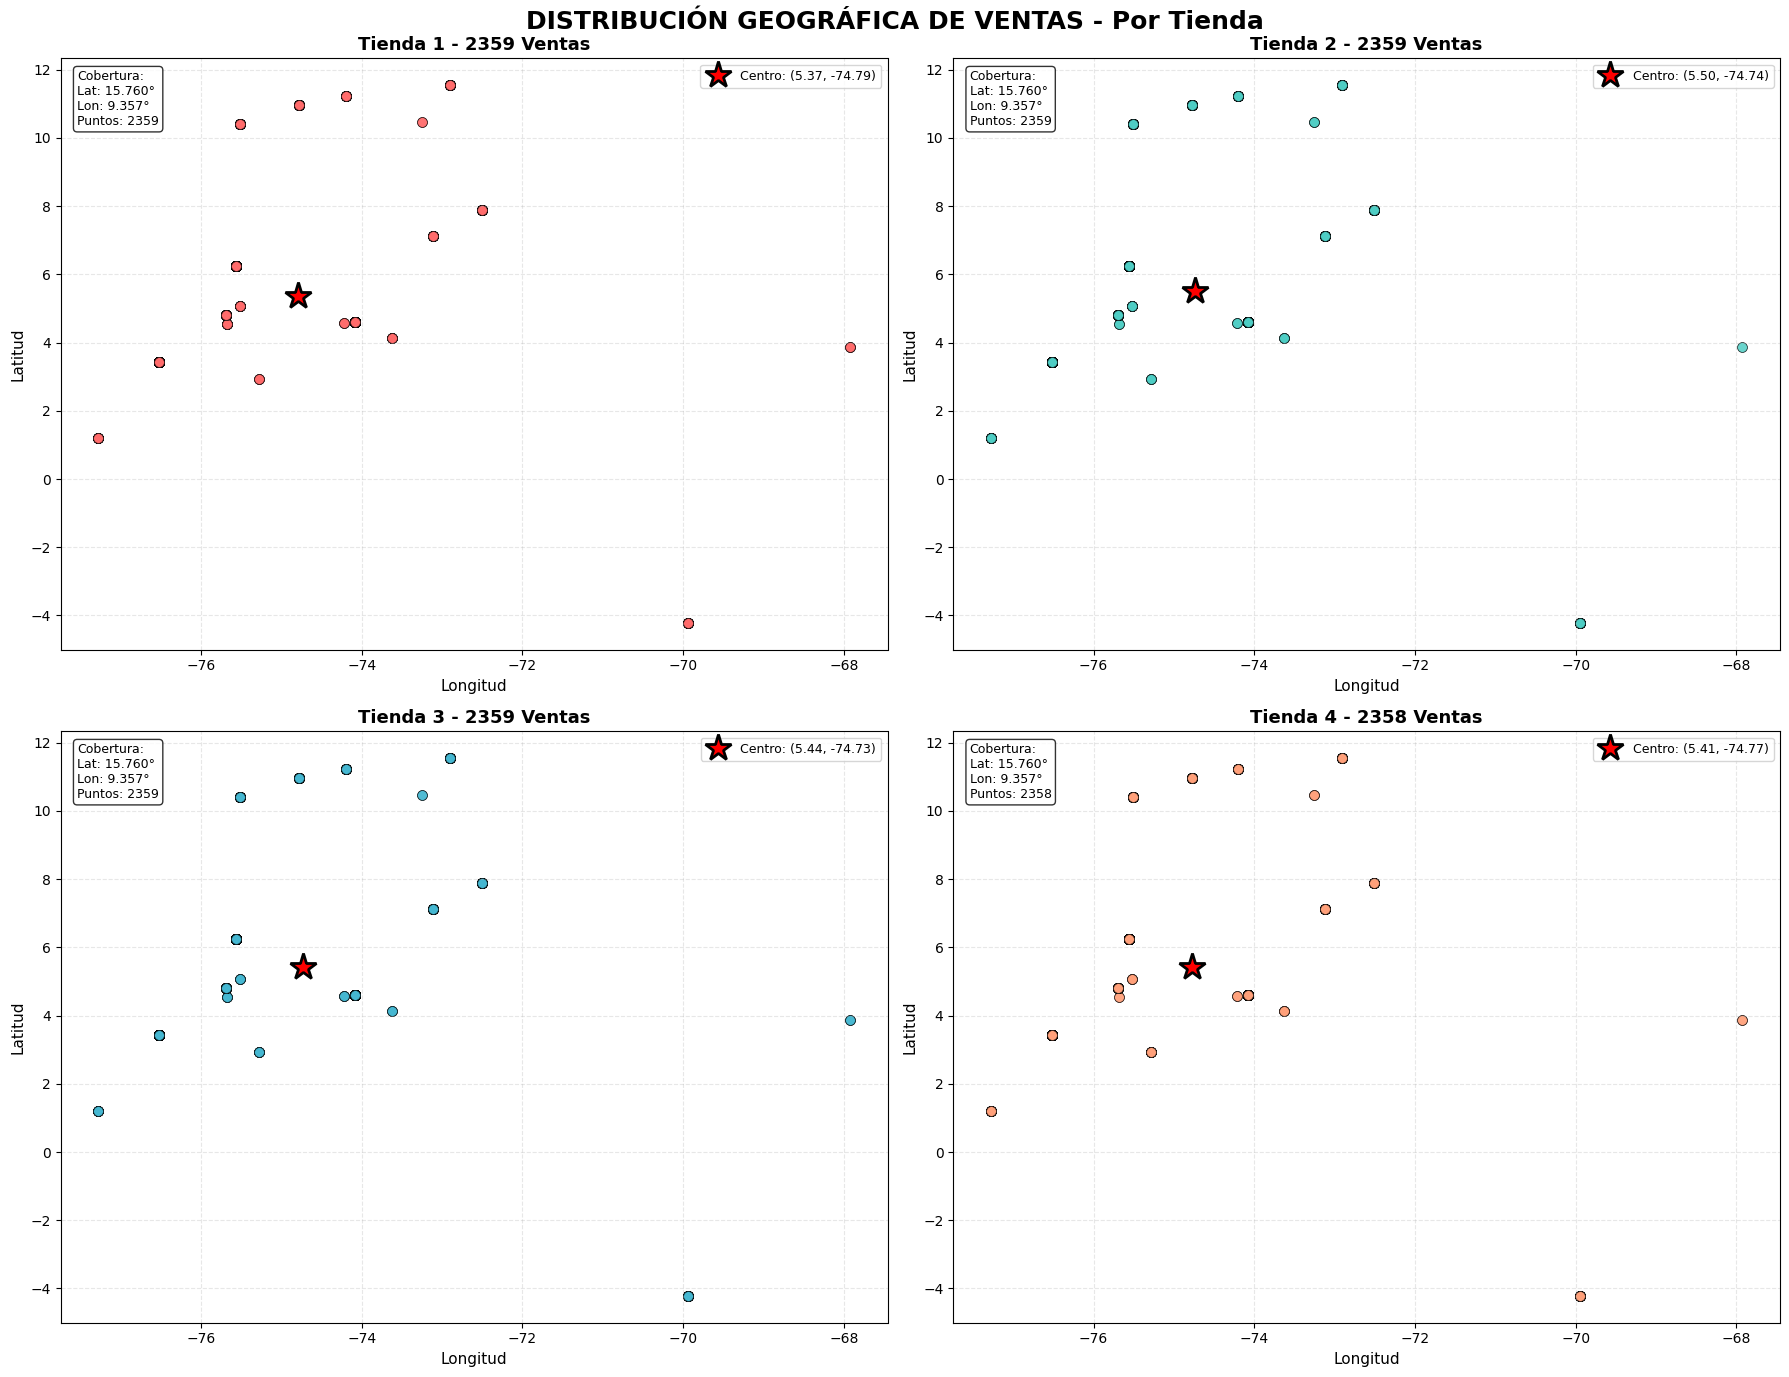

✓ Mapas de dispersión generados correctamente



In [40]:
# VISUALIZACIÓN 1: MAPAS DE DISPERSIÓN POR TIENDA


if len(datos_geo) > 0:
    # Determinar layout según cantidad de tiendas
    if len(datos_geo) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        axes = [ax]
    elif len(datos_geo) == 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    elif len(datos_geo) == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        axes = axes.flatten()

    fig.suptitle('DISTRIBUCIÓN GEOGRÁFICA DE VENTAS - Por Tienda',
                 fontsize=18, fontweight='bold')

    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    for idx, dato in enumerate(datos_geo):
        ax = axes[idx] if len(datos_geo) > 1 else axes[0]
        df = dato['df']
        col_lat = dato['col_lat']
        col_lon = dato['col_lon']

        # Convertir a numérico y limpiar
        lat_data = pd.to_numeric(df[col_lat], errors='coerce')
        lon_data = pd.to_numeric(df[col_lon], errors='coerce')

        # Filtrar valores válidos
        valid_mask = ~(lat_data.isna() | lon_data.isna())
        lat_clean = lat_data[valid_mask]
        lon_clean = lon_data[valid_mask]

        # Crear scatter plot
        scatter = ax.scatter(lon_clean, lat_clean,
                            c=colores[idx], alpha=0.6, s=50,
                            edgecolors='black', linewidth=0.5)

        ax.set_xlabel('Longitud', fontsize=11)
        ax.set_ylabel('Latitud', fontsize=11)
        ax.set_title(f'Tienda {dato["tienda"]} - {len(lat_clean)} Ventas',
                     fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')

        # Agregar información estadística
        centro_lat = lat_clean.mean()
        centro_lon = lon_clean.mean()

        # Marcar el centro geográfico
        ax.plot(centro_lon, centro_lat, 'r*', markersize=20,
                markeredgecolor='black', markeredgewidth=2,
                label=f'Centro: ({centro_lat:.2f}, {centro_lon:.2f})')

        ax.legend(fontsize=9, loc='best')

        # Calcular y mostrar área de cobertura
        lat_span = lat_clean.max() - lat_clean.min()
        lon_span = lon_clean.max() - lon_clean.min()

        info_text = f"Cobertura:\nLat: {lat_span:.3f}°\nLon: {lon_span:.3f}°\nPuntos: {len(lat_clean)}"
        ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Ocultar ejes no utilizados if there are fewer than 4 stores
    if len(datos_geo) < 4 and len(datos_geo) > 1:
        for idx in range(len(datos_geo), len(axes)):
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("✓ Mapas de dispersión generados correctamente\n")
else:
    print("⚠️ No hay datos geográficos disponibles para visualizar")
    print("   Posibles razones:")
    print("   - Las columnas de latitud/longitud tienen nombres diferentes")
    print("   - Los datos no contienen información geográfica")
    print("   - Las columnas contienen valores no numéricos\n")

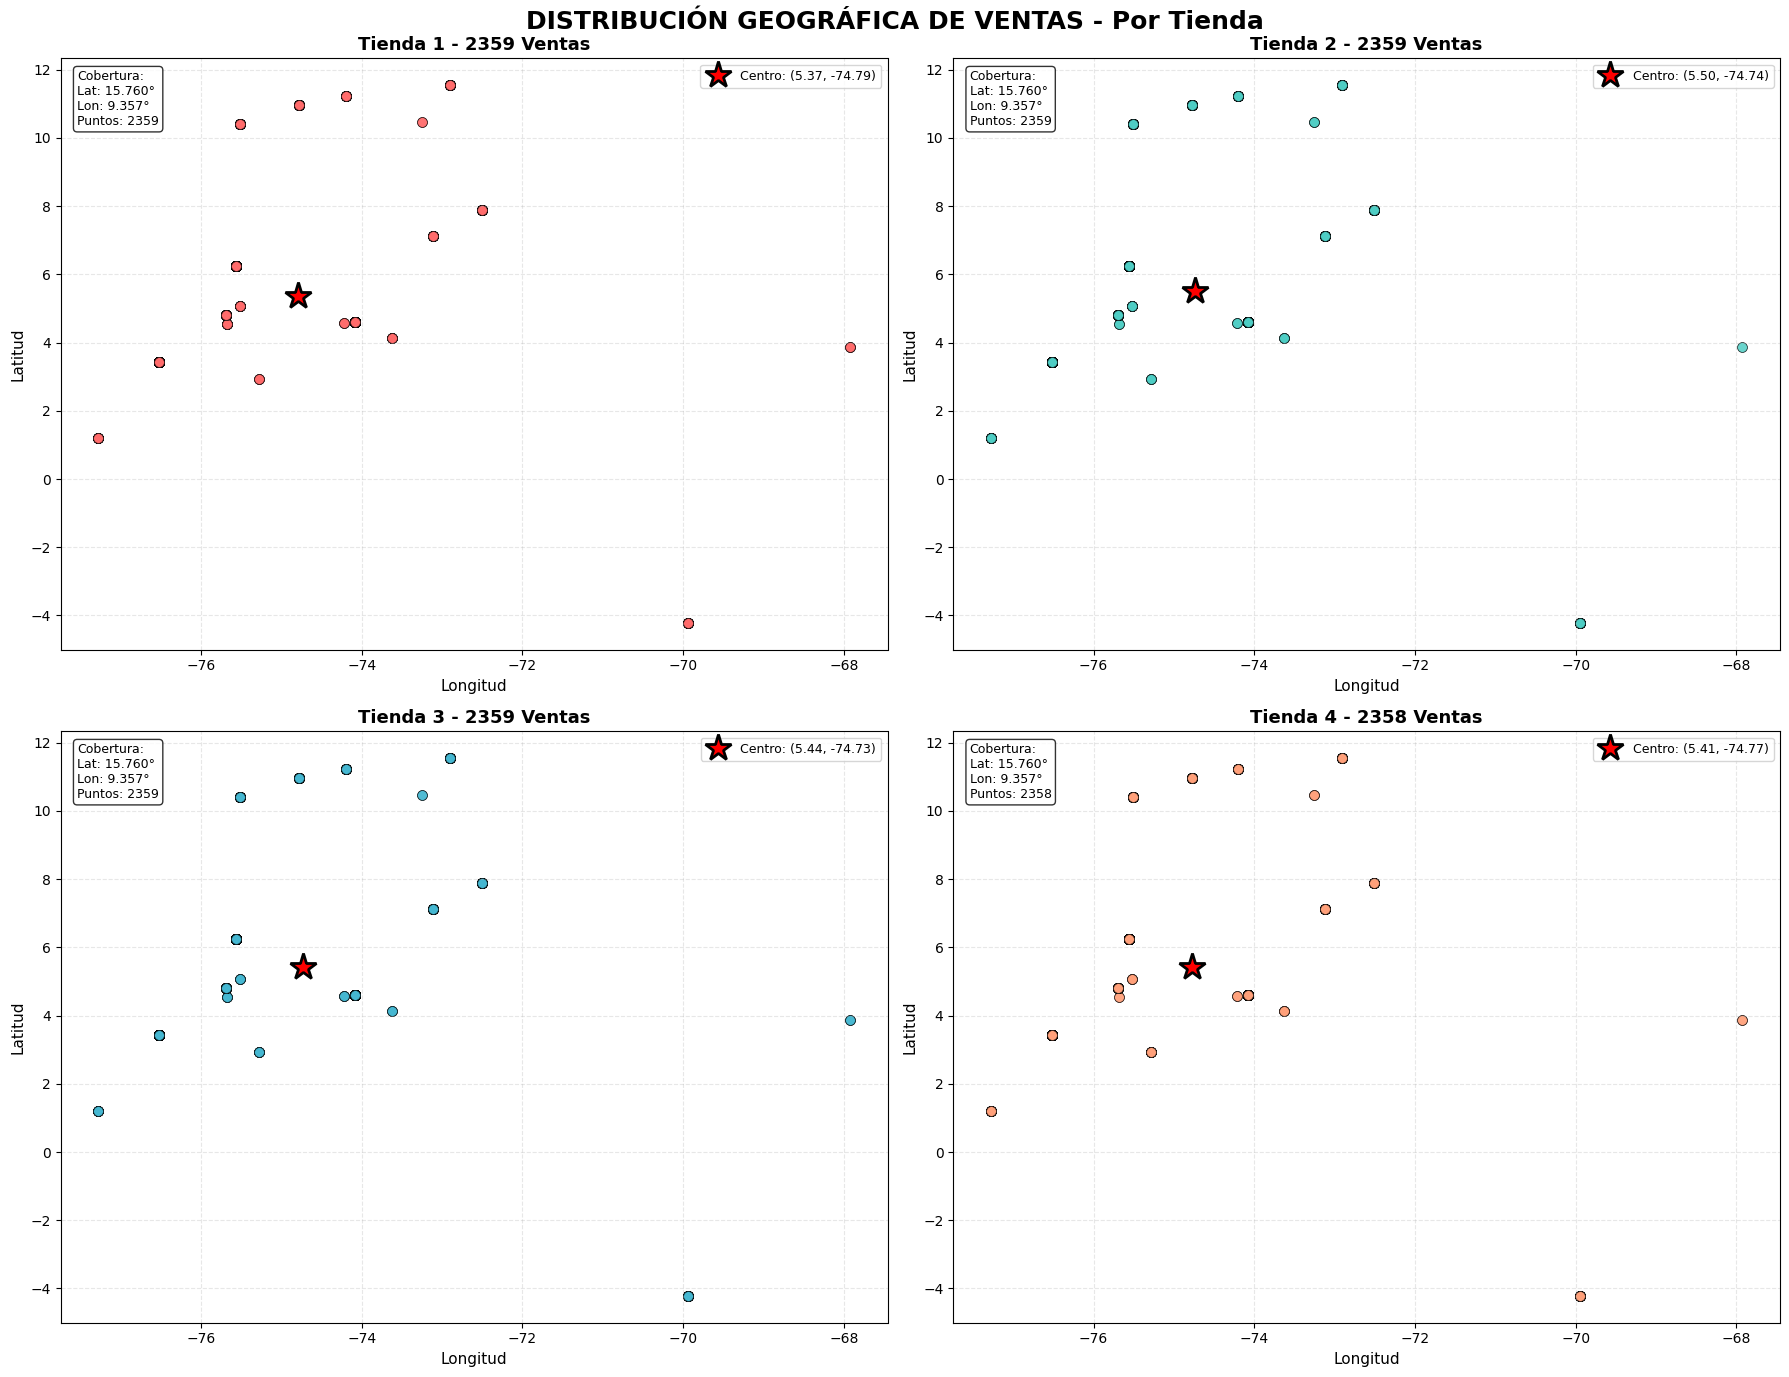

✓ Mapas de dispersión generados correctamente



In [32]:
# VISUALIZACIÓN 1: MAPAS DE DISPERSIÓN POR TIENDA


if len(datos_geo) > 0:
    # Determinar layout según cantidad de tiendas
    if len(datos_geo) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        axes = [ax]
    elif len(datos_geo) == 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    elif len(datos_geo) == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        axes = axes.flatten()

    fig.suptitle('DISTRIBUCIÓN GEOGRÁFICA DE VENTAS - Por Tienda',
                 fontsize=18, fontweight='bold')

    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    for idx, dato in enumerate(datos_geo):
        ax = axes[idx] if len(datos_geo) > 1 else axes[0]
        df = dato['df']
        col_lat = dato['col_lat']
        col_lon = dato['col_lon']

        # Convertir a numérico y limpiar
        lat_data = pd.to_numeric(df[col_lat], errors='coerce')
        lon_data = pd.to_numeric(df[col_lon], errors='coerce')

        # Filtrar valores válidos
        valid_mask = ~(lat_data.isna() | lon_data.isna())
        lat_clean = lat_data[valid_mask]
        lon_clean = lon_data[valid_mask]

        # Crear scatter plot
        scatter = ax.scatter(lon_clean, lat_clean,
                            c=colores[idx], alpha=0.6, s=50,
                            edgecolors='black', linewidth=0.5)

        ax.set_xlabel('Longitud', fontsize=11)
        ax.set_ylabel('Latitud', fontsize=11)
        ax.set_title(f'Tienda {dato["tienda"]} - {len(lat_clean)} Ventas',
                     fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')

        # Agregar información estadística
        centro_lat = lat_clean.mean()
        centro_lon = lon_clean.mean()

        # Marcar el centro geográfico
        ax.plot(centro_lon, centro_lat, 'r*', markersize=20,
                markeredgecolor='black', markeredgewidth=2,
                label=f'Centro: ({centro_lat:.2f}, {centro_lon:.2f})')

        ax.legend(fontsize=9, loc='best')

        # Calcular y mostrar área de cobertura
        lat_span = lat_clean.max() - lat_clean.min()
        lon_span = lon_clean.max() - lon_clean.min()

        info_text = f"Cobertura:\nLat: {lat_span:.3f}°\nLon: {lon_span:.3f}°\nPuntos: {len(lat_clean)}"
        ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Ocultar ejes no utilizados si hay menos de 4 tiendas
    if len(datos_geo) < 4 and len(datos_geo) > 1:
        for idx in range(len(datos_geo), len(axes)):
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("✓ Mapas de dispersión generados correctamente\n")
else:
    print("⚠️ No hay datos geográficos disponibles para visualizar")
    print("   Posibles razones:")
    print("   - Las columnas de latitud/longitud tienen nombres diferentes")
    print("   - Los datos no contienen información geográfica")
    print("   - Las columnas contienen valores no numéricos\n")